In [4]:
#!pip install imblearn

In [5]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import multivariate_normal
from sklearn.neighbors import KNeighborsClassifier

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 20)

In [7]:
data_f = pd.read_csv("Features_For_Traditional_ML_Techniques.csv")
data_f

,Unnamed: 0,majority_target,statement,BinaryNumTarget,tweet,followers_count,friends_count,favourites_count,statuses_count,listed_count,following,embeddings,BotScore,BotScoreBinary,cred,normalize_influence,mentions,quotes,replies,retweets,favourites,hashtags,URLs,unique_count,total_count,ORG_percentage,NORP_percentage,GPE_percentage,PERSON_percentage,MONEY_percentage,DATE_percentage,CARDINAL_percentage,PERCENT_percentage,ORDINAL_percentage,FAC_percentage,LAW_percentage,PRODUCT_percentage,EVENT_percentage,TIME_percentage,LOC_percentage,WORK_OF_ART_percentage,QUANTITY_percentage,LANGUAGE_percentage,Word count,Max word length,Min word length,Average word length,present_verbs,past_verbs,adjectives,adverbs,adpositions,pronouns,TOs,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq
0,0,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,4262.0,3619.0,34945.0,16423.0,44.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.540794,0.104602,1.0,1.0,1.0,3.0,10.0,0.0,1.0,5,6,0.333333,0.166667,0.166667,0.166667,0.166667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42,14,1,5.476190,1,1,1,0,4,1,0,0,0,5,0,1,0,33,3,5,19
1,1,True,End of eviction moratorium means millions of A...,1.0,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,1393.0,1621.0,31436.0,37184.0,64.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.462177,0.094436,3.0,0.0,0.0,0.0,1.0,0.0,1.0,2,4,0.000000,0.250000,0.000000,0.750000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51,15,1,4.627451,7,2,2,0,5,8,2,0,2,1,0,0,0,14,0,2,34
2,2,True,End of eviction moratorium means millions of A...,1.0,THE SUPREME COURT is siding with super rich pr...,9.0,84.0,219.0,1184.0,0.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]],0.03,0.0,0.096774,0.039846,0.0,2.0,5.0,0.0,0.0,0.0,1.0,1,1,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26,16,1,6.038462,0,0,7,3,1,0,1,0,1,0,0,0,0,3,0,4,10
3,3,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders\n\nBroken campaign promi...,4262.0,3619.0,34945.0,16423.0,44.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.540794,0.104602,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4,6,0.000000,0.333333,0.000000,0.166667,0.166667,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49,10,2,4.653061,4,6,3,2,7,1,1,0,1,3,0,0,1,6,8,1,30
4,4,True,End of eviction moratorium means millions of A...,1.0,@OhComfy I agree. The confluence of events rig...,70.0,166.0,15282.0,2194.0,0.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.296610,0.061135,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3,3,0.333333,0.000000,0.333333,0.000000,0.333333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33,12,1,5.121212,2,2,2,3,2,2,0,0,1,3,0,1,0,11,3,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134193,134193,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,Joe Biden's family owned African slaves....\n\...,2075.0,2662.0,156306.0,62375.0,3.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.438041,0.098915,0.0,1.0,1.0,1.0,2.0,0.0,1.0,1,3,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50,16,1,4.900000,4,3,2,2,8,2,0,0,2,1,0,3,0,31,0,4,32
134194,134194,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,"Joe Bidens great, great grandfather was a slav...",1636.0,1626.0,215290.0,44011.0,10.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.501533,0.096203,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2,2,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,14,2,5.947368,3,0,1,0,3,2,0,0,0,1,0,0,0,16,6,2,8
134195,134195,False,Joe Bidens great-grandfather Joseph J. 

In [8]:
data_f.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134198 entries, 0 to 134197
Data columns (total 64 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              134198 non-null  int64  
 1   majority_target         134198 non-null  bool   
 2   statement               134198 non-null  object 
 3   BinaryNumTarget         134198 non-null  float64
 4   tweet                   134198 non-null  object 
 5   followers_count         134198 non-null  float64
 6   friends_count           134198 non-null  float64
 7   favourites_count        134198 non-null  float64
 8   statuses_count          134198 non-null  float64
 9   listed_count            134198 non-null  float64
 10  following               134198 non-null  float64
 11  embeddings              134198 non-null  object 
 12  BotScore                134198 non-null  float64
 13  BotScoreBinary          134198 non-null  float64
 14  cred                

In [9]:
data_t = pd.read_csv("Truth_Seeker_Model_Dataset.csv")
data_t

,Unnamed: 0,author,statement,target,BinaryNumTarget,manual_keywords,tweet,5_label_majority_answer,3_label_majority_answer
0,0,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders - 6 Month Update\n\nInfl...,Mostly Agree,Agree
1,1,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,NO MAJORITY,Agree
2,2,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",THE SUPREME COURT is siding with super rich pr...,Agree,Agree
3,3,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders\n\nBroken campaign promi...,Mostly Agree,Agree
4,4,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@OhComfy I agree. The confluence of events rig...,Agree,Agree
...,...,...,...,...,...,...,...,...,...
134193,134193,Tom Kertscher,Joe Bidens great-grandfather Joseph J. Biden w...,False,0.0,"Biden, great grandfather, slave owner",Joe Biden's family owned African slaves....\n\...,Mostly Agree,Agree
134194,134194,Tom Kertscher,Joe Bidens great-grandfather Joseph J. Biden w...,False,0.0,"Biden, great grandfather, slave owner","Joe Bidens great, great grandfather was a slav...",Agree,Agree
134195,134195,Tom Kertscher,Joe Bidens great-grandfather Joseph J. Biden w...,False,0.0,"Biden, great grandfather, slave owner","@ChevyChaseToGo ""Joe Bidens great-grandfather ...",Mostly Agree,Agree
134196,134196,Tom Kertscher,Joe Bidens great-grandfather Joseph J. Biden w...,False,0.0,"Biden, great grandfather, slave owner",@JoeBiden Facts are Bidens VP Kamala Harris Gr...,NO MAJORITY,Agree


In [10]:
data_t.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134198 entries, 0 to 134197
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               134198 non-null  int64  
 1   author                   134198 non-null  object 
 2   statement                134198 non-null  object 
 3   target                   134198 non-null  bool   
 4   BinaryNumTarget          134198 non-null  float64
 5   manual_keywords          134198 non-null  object 
 6   tweet                    134198 non-null  object 
 7   5_label_majority_answer  134198 non-null  object 
 8   3_label_majority_answer  134198 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 8.3+ MB


In [11]:
data_f.describe(percentiles = [.2, .4, .6, .8]) 

,Unnamed: 0,BinaryNumTarget,followers_count,friends_count,favourites_count,statuses_count,listed_count,following,BotScore,BotScoreBinary,cred,normalize_influence,mentions,quotes,replies,retweets,favourites,hashtags,URLs,unique_count,total_count,ORG_percentage,NORP_percentage,GPE_percentage,PERSON_percentage,MONEY_percentage,DATE_percentage,CARDINAL_percentage,PERCENT_percentage,ORDINAL_percentage,FAC_percentage,LAW_percentage,PRODUCT_percentage,EVENT_percentage,TIME_percentage,LOC_percentage,WORK_OF_ART_percentage,QUANTITY_percentage,LANGUAGE_percentage,Word count,Max word length,Min word length,Average word length,present_verbs,past_verbs,adjectives,adverbs,adpositions,pronouns,TOs,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq
count,134198.00000,134198.000000,1.341980e+05,134198.000000,1.341980e+05,1.341980e+05,134198.000000,134198.0,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.00000,134198.000000,134198.000000,134198.000000,134198.00000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000
mean,67098.50000,0.513644,1.129308e+04,1893.454455,3.298123e+04,3.419576e+04,73.300198,0.0,0.059106,0.032355,0.405852,0.077665,1.388918,0.573406,1.914201,6.674354,27.572386,0.104726,0.737701,2.365624,3.441229,0.199964,0.067412,0.136151,0.221930,0.029525,0.102339,0.091104,0.030638,0.012432,0.003352,0.005265,0.006839,0.002607,0.005662,0.009771,0.008517,0.002396,0.001011,35.077691,13.062043,1.399857,5.056648,2.452354,1.81221,3.034308,1.575873,3.619644,1.49582,0.788626,0.135583,1.003495,2.366116,0.259408,0.307151,0.121537,12.831905,3.559494,2.249557,21.438658
std,38739.77005,0.499816,4.374971e+05,6997.695671,6.878021e+04,7.510120e+04,1083.274277,0.0,0.167819,0.176942,0.239223,0.026184,1.471604,28.436726,122.041183,406.542579,1831.425703,0.458687,0.439886,1.351617,2.479373,0.276376,0.165502,0.242561,0.298133,0.106880,0.206059,0.190366,0.116949,0.070884,0.037525,0.048690,0.053513,0.032400,0.046830,0.070224,0.062580,0.030757,0.019590,13.604442,3.044782,2.795407,0.825737,2.049247,1.73699,2.012125,1.546382,2.195625,1.63947,0.961242,0.379235,1.086844,2.140459,0.903957,0.774367,0.453865,15.557524,6.674458,2.912136,9.625147
min,0.00000,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20%,26839.40000,0.000000,4.500000e+01,122.000000,7.920000e+02,2.134000e+03,0.000000,0.0,0.030000,0.000000,0.189189,0.057038,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,11.000000,1.000000,4.479167,1.000000,0.00000,1.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,12.000000
40%,53678.80000,0.000000,1.950000e+02,363.000000,4.580800e+03,7.025000e+03,1.000000,0.0,0.030000,0.000000,0.323529,0.072973,1.00

In [12]:
data_t.describe(percentiles = [.2, .4, .6, .8]) 

,Unnamed: 0,BinaryNumTarget
count,134198.00000,134198.000000
mean,67098.50000,0.513644
std,38739.77005,0.499816
min,0.00000,0.000000
20%,26839.40000,0.000000
40%,53678.80000,0.000000
50%,67098.50000,1.000000
60%,80518.20000,1.000000
80%,107357.60000,1.000000
max,134197.00000,1.000000


In [13]:
data = pd.merge(data_f, data_t, on=['statement', 'BinaryNumTarget', 'tweet'])

In [14]:
data

,Unnamed: 0_x,majority_target,statement,BinaryNumTarget,tweet,followers_count,friends_count,favourites_count,statuses_count,listed_count,following,embeddings,BotScore,BotScoreBinary,cred,normalize_influence,mentions,quotes,replies,retweets,favourites,hashtags,URLs,unique_count,total_count,ORG_percentage,NORP_percentage,GPE_percentage,PERSON_percentage,MONEY_percentage,DATE_percentage,CARDINAL_percentage,PERCENT_percentage,ORDINAL_percentage,FAC_percentage,LAW_percentage,PRODUCT_percentage,EVENT_percentage,TIME_percentage,LOC_percentage,WORK_OF_ART_percentage,QUANTITY_percentage,LANGUAGE_percentage,Word count,Max word length,Min word length,Average word length,present_verbs,past_verbs,adjectives,adverbs,adpositions,pronouns,TOs,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq,Unnamed: 0_y,author,target,manual_keywords,5_label_majority_answer,3_label_majority_answer
0,0,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,4262.0,3619.0,34945.0,16423.0,44.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.540794,0.104602,1.0,1.0,1.0,3.0,10.0,0.0,1.0,5,6,0.333333,0.166667,0.166667,0.166667,0.166667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42,14,1,5.476190,1,1,1,0,4,1,0,0,0,5,0,1,0,33,3,5,19,0,D.L. Davis,True,"Americans, eviction moratorium",Mostly Agree,Agree
1,1,True,End of eviction moratorium means millions of A...,1.0,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,1393.0,1621.0,31436.0,37184.0,64.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.462177,0.094436,3.0,0.0,0.0,0.0,1.0,0.0,1.0,2,4,0.000000,0.250000,0.000000,0.750000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51,15,1,4.627451,7,2,2,0,5,8,2,0,2,1,0,0,0,14,0,2,34,1,D.L. Davis,True,"Americans, eviction moratorium",NO MAJORITY,Agree
2,2,True,End of eviction moratorium means millions of A...,1.0,THE SUPREME COURT is siding with super rich pr...,9.0,84.0,219.0,1184.0,0.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]],0.03,0.0,0.096774,0.039846,0.0,2.0,5.0,0.0,0.0,0.0,1.0,1,1,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26,16,1,6.038462,0,0,7,3,1,0,1,0,1,0,0,0,0,3,0,4,10,2,D.L. Davis,True,"Americans, eviction moratorium",Agree,Agree
3,3,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders\n\nBroken campaign promi...,4262.0,3619.0,34945.0,16423.0,44.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.540794,0.104602,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4,6,0.000000,0.333333,0.000000,0.166667,0.166667,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49,10,2,4.653061,4,6,3,2,7,1,1,0,1,3,0,0,1,6,8,1,30,3,D.L. Davis,True,"Americans, eviction moratorium",Mostly Agree,Agree
4,4,True,End of eviction moratorium means millions of A...,1.0,@OhComfy I agree. The confluence of events rig...,70.0,166.0,15282.0,2194.0,0.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.296610,0.061135,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3,3,0.333333,0.000000,0.333333,0.000000,0.333333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33,12,1,5.121212,2,2,2,3,2,2,0,0,1,3,0,1,0,11,3,2,19,4,D.L. Davis,True,"Americans, eviction moratorium",Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134193,134193,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,Joe Biden's family owned African slaves....\n\...,2075.0,2662.0,156306.0,62375.0,3.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.438041,0.098915,0.0,1.0,1.0,1.0,2.0,0.0,1.0,1,3,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50,16,1,4.900000,4,3,2,2,8,2,0,0,2,1,0,3,0,31,0,4,32,134193,Tom Kertscher,Fal

In [15]:
unique_val = len(pd.unique(data['statement']))
unique_val

1058

Choosing subset which will be split into training and testing data.

In [16]:
data_s = data.sample(n=500, replace=False, random_state=1)

In [17]:
data_s

,Unnamed: 0_x,majority_target,statement,BinaryNumTarget,tweet,followers_count,friends_count,favourites_count,statuses_count,listed_count,following,embeddings,BotScore,BotScoreBinary,cred,normalize_influence,mentions,quotes,replies,retweets,favourites,hashtags,URLs,unique_count,total_count,ORG_percentage,NORP_percentage,GPE_percentage,PERSON_percentage,MONEY_percentage,DATE_percentage,CARDINAL_percentage,PERCENT_percentage,ORDINAL_percentage,FAC_percentage,LAW_percentage,PRODUCT_percentage,EVENT_percentage,TIME_percentage,LOC_percentage,WORK_OF_ART_percentage,QUANTITY_percentage,LANGUAGE_percentage,Word count,Max word length,Min word length,Average word length,present_verbs,past_verbs,adjectives,adverbs,adpositions,pronouns,TOs,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq,Unnamed: 0_y,author,target,manual_keywords,5_label_majority_answer,3_label_majority_answer
12759,12759,True,"""If you go back, you can see Wayne LaPierre, w...",1.0,"@MFOLParkland ""We think it's reasonable to pro...",2612.0,4998.0,171448.0,185550.0,11.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.343233,0.102233,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3,5,0.600000,0.0,0.00,0.200000,0.0,0.000000,0.200000,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45,10,1,4.777778,2,2,2,4,6,3,1,1,2,2,0,0,1,14,0,1,27,12759,Bill McCarthy,True,"Wayne LaPierre, background checks",NO MAJORITY,Agree
105052,105052,False,Photo shows Kelly Loefflers house.,0.0,@MollyJongFast The GOP just sent Tommy Tubervi...,160.0,455.0,42836.0,2623.0,9.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.260163,0.069635,1.0,0.0,5.0,22.0,223.0,0.0,1.0,4,4,0.000000,0.0,0.25,0.000000,0.0,0.250000,0.250000,0.0,0.25,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35,13,2,4.742857,2,0,3,2,3,0,2,0,1,0,0,0,0,6,3,1,17,105052,Ciara O'Rourke,False,"Kelly Loeffler, house",Mostly Agree,Agree
91929,91929,True,"New Jersey has ""the highest property taxes in ...",1.0,"With the highest property taxes, seven percent...",342.0,169.0,8107.0,7261.0,8.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.669276,0.078588,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3,7,0.142857,0.0,0.00,0.142857,0.0,0.000000,0.714286,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,14,1,4.391304,1,1,1,1,1,0,0,0,0,3,0,1,0,5,14,2,17,91929,Caryn Shinske,True,"New Jersey, highest property taxes",NO MAJORITY,Agree
38545,38545,True,"Says President Barack Obama ""will not utter th...",1.0,@Kalidog4 @Jimdotbeep @goodyweaver The term wa...,40.0,217.0,10080.0,1606.0,0.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.155642,0.055086,3.0,0.0,1.0,0.0,4.0,0.0,1.0,2,2,0.000000,0.0,0.00,0.500000,0.0,0.500000,0.000000,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25,8,1,4.440000,2,0,3,0,5,0,0,0,0,4,0,0,0,6,2,0,18,38545,Sean Gorman,True,"Obama, radical islamic terrorism",Mostly Agree,Agree
4494,4494,True,The president's own FBI director said that the...,1.0,@tj110_ the fbi director said white supremacis...,78.0,80.0,2113.0,12466.0,0.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.493671,0.064567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4,0.250000,0.0,0.00,0.250000,0.0,0.250000,0.000000,0.0,0.00,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40,13,2,5.875000,3,1,6,1,4,0,0,0,0,2,0,0,0,14,1,4,17,4494,Amy Sherman,True,"FBI director, white supremacists",Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73124,73124,True,"Polls show that Americans ""overwhelmingly"" sup...",1.0,VAST MAJORITY of Americans and NRA members sup...,3781.0,2849.0,21240.0,15971.0,28.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.570287,0.103383,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1,1,1.000000,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33,11,1,4.424242,5,3,3,3,3,3,2,0,2,1,0,0

In [18]:
data['target'].value_counts()

True     68930
False    65268
Name: target, dtype: int64

In [19]:
data_s['target'].value_counts()

True     260
False    240
Name: target, dtype: int64

In [20]:
x = data_s.loc[:, ~data_s.columns.isin(['5_label_majority_answer','3_label_majority_answer','target'])]
y = data_s.iloc[:, data_s.columns.isin(['target'])]

In [21]:
x

,Unnamed: 0_x,majority_target,statement,BinaryNumTarget,tweet,followers_count,friends_count,favourites_count,statuses_count,listed_count,following,embeddings,BotScore,BotScoreBinary,cred,normalize_influence,mentions,quotes,replies,retweets,favourites,hashtags,URLs,unique_count,total_count,ORG_percentage,NORP_percentage,GPE_percentage,PERSON_percentage,MONEY_percentage,DATE_percentage,CARDINAL_percentage,PERCENT_percentage,ORDINAL_percentage,FAC_percentage,LAW_percentage,PRODUCT_percentage,EVENT_percentage,TIME_percentage,LOC_percentage,WORK_OF_ART_percentage,QUANTITY_percentage,LANGUAGE_percentage,Word count,Max word length,Min word length,Average word length,present_verbs,past_verbs,adjectives,adverbs,adpositions,pronouns,TOs,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq,Unnamed: 0_y,author,manual_keywords
12759,12759,True,"""If you go back, you can see Wayne LaPierre, w...",1.0,"@MFOLParkland ""We think it's reasonable to pro...",2612.0,4998.0,171448.0,185550.0,11.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.343233,0.102233,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3,5,0.600000,0.0,0.00,0.200000,0.0,0.000000,0.200000,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45,10,1,4.777778,2,2,2,4,6,3,1,1,2,2,0,0,1,14,0,1,27,12759,Bill McCarthy,"Wayne LaPierre, background checks"
105052,105052,False,Photo shows Kelly Loefflers house.,0.0,@MollyJongFast The GOP just sent Tommy Tubervi...,160.0,455.0,42836.0,2623.0,9.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.260163,0.069635,1.0,0.0,5.0,22.0,223.0,0.0,1.0,4,4,0.000000,0.0,0.25,0.000000,0.0,0.250000,0.250000,0.0,0.25,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35,13,2,4.742857,2,0,3,2,3,0,2,0,1,0,0,0,0,6,3,1,17,105052,Ciara O'Rourke,"Kelly Loeffler, house"
91929,91929,True,"New Jersey has ""the highest property taxes in ...",1.0,"With the highest property taxes, seven percent...",342.0,169.0,8107.0,7261.0,8.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.669276,0.078588,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3,7,0.142857,0.0,0.00,0.142857,0.0,0.000000,0.714286,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,14,1,4.391304,1,1,1,1,1,0,0,0,0,3,0,1,0,5,14,2,17,91929,Caryn Shinske,"New Jersey, highest property taxes"
38545,38545,True,"Says President Barack Obama ""will not utter th...",1.0,@Kalidog4 @Jimdotbeep @goodyweaver The term wa...,40.0,217.0,10080.0,1606.0,0.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.155642,0.055086,3.0,0.0,1.0,0.0,4.0,0.0,1.0,2,2,0.000000,0.0,0.00,0.500000,0.0,0.500000,0.000000,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25,8,1,4.440000,2,0,3,0,5,0,0,0,0,4,0,0,0,6,2,0,18,38545,Sean Gorman,"Obama, radical islamic terrorism"
4494,4494,True,The president's own FBI director said that the...,1.0,@tj110_ the fbi director said white supremacis...,78.0,80.0,2113.0,12466.0,0.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.493671,0.064567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4,0.250000,0.0,0.00,0.250000,0.0,0.250000,0.000000,0.0,0.00,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40,13,2,5.875000,3,1,6,1,4,0,0,0,0,2,0,0,0,14,1,4,17,4494,Amy Sherman,"FBI director, white supremacists"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73124,73124,True,"Polls show that Americans ""overwhelmingly"" sup...",1.0,VAST MAJORITY of Americans and NRA members sup...,3781.0,2849.0,21240.0,15971.0,28.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.570287,0.103383,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1,1,1.000000,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33,11,1,4.424242,5,3,3,3,3,3,2,0,2,1,0,0,0,5,0,1,20,73124,Louis Jacobson,"Americans support, expanding background checks"
123803,123803,False,Says Joe Biden and Kamala Harris would raise t...,0.0,@davidgokhshtein not if

In [22]:
y

,target
12759,True
105052,False
91929,True
38545,True
4494,True
...,...
73124,True
123803,False
950,True
7825,True


Splitting the data into training and testing datasets. 

In [23]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=1, shuffle = True)

In [24]:
y_test['target'].value_counts()

True     83
False    67
Name: target, dtype: int64

In [25]:
83/(83+67)

0.5533333333333333

In [26]:
y_train['target'].value_counts()

True     177
False    173
Name: target, dtype: int64

In [27]:
177/(177+173)

0.5057142857142857

Modeling will be done based on utilzing the target field as the response variable. 

The testing data and training data have similar proportions of true vs false values in the target field. 

# Exploratory Data Analysis

In [1]:
import ydata_profiling
#prof = ProfileReport(data_s)

/Users/kys/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/kys/opt/anaconda3/lib/python3.9/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [29]:
#prof

In [30]:
cor_table = data_s.corr()
pd.set_option('display.max_rows', 70)
cor_table

,Unnamed: 0_x,majority_target,BinaryNumTarget,followers_count,friends_count,favourites_count,statuses_count,listed_count,following,BotScore,BotScoreBinary,cred,normalize_influence,mentions,quotes,replies,retweets,favourites,hashtags,URLs,unique_count,total_count,ORG_percentage,NORP_percentage,GPE_percentage,PERSON_percentage,MONEY_percentage,DATE_percentage,CARDINAL_percentage,PERCENT_percentage,ORDINAL_percentage,FAC_percentage,LAW_percentage,PRODUCT_percentage,EVENT_percentage,TIME_percentage,LOC_percentage,WORK_OF_ART_percentage,QUANTITY_percentage,LANGUAGE_percentage,Word count,Max word length,Min word length,Average word length,present_verbs,past_verbs,adjectives,adverbs,adpositions,pronouns,TOs,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq,Unnamed: 0_y,target
Unnamed: 0_x,1.000000,-0.701882,-0.741089,-0.045647,-0.061827,-0.061643,-0.062285,-0.060135,NaN,0.006066,0.006992,-0.128701,-0.126740,-0.032627,-0.055120,-0.045549,-0.056378,-0.052355,-0.021271,0.039155,-0.032882,-0.021042,-0.037767,-0.040613,-0.036294,0.226740,-0.021663,-0.080474,-0.069577,-0.043759,0.019335,-0.038753,-0.012388,-0.025809,-0.056021,0.091815,-0.031148,0.022499,-0.013812,NaN,-0.047869,-0.043642,0.000028,-0.060168,0.114708,-0.029955,-0.147603,-0.072879,-0.139128,0.095344,0.067538,0.058011,0.024075,-0.094191,0.034688,0.057653,0.085515,0.081741,-0.025497,-0.043026,-0.043235,1.000000,-0.741089
majority_target,-0.701882,1.000000,0.931991,0.044253,0.041066,0.040317,0.071303,0.087343,NaN,-0.015353,-0.016032,0.135853,0.166998,-0.024607,0.016211,-0.005104,0.029638,0.016466,0.020963,-0.046293,0.054252,0.027512,-0.044030,0.021954,-0.003415,-0.128445,0.117964,0.052994,0.140880,-0.006268,-0.001379,0.029815,0.021149,0.005694,0.079308,-0.076439,0.089393,-0.029084,-0.020621,NaN,-0.066274,-0.077086,0.020923,-0.014298,-0.131870,0.001379,0.044558,-0.014702,0.040971,-0.141987,-0.079866,-0.025608,-0.051190,0.013295,-0.009410,-0.047717,-0.044049,-0.074690,0.012702,-0.044757,-0.059573,-0.701882,0.931991
BinaryNumTarget,-0.741089,0.931991,1.000000,0.041552,0.036084,0.042443,0.058248,0.081447,NaN,-0.016969,-0.018425,0.148402,0.157387,-0.022088,0.016082,-0.006609,0.028994,0.015823,0.018071,-0.048084,0.087275,0.047557,-0.045552,0.040561,0.000754,-0.151023,0.117453,0.049438,0.142822,0.030258,-0.003596,0.028261,0.087998,0.003907,0.078361,-0.078209,0.087473,-0.030108,-0.021638,NaN,-0.041052,-0.048229,0.037070,-0.005787,-0.100519,-0.033514,0.088959,-0.013486,0.052364,-0.155621,-0.067505,-0.030209,-0.026705,0.024412,-0.052672,-0.046777,-0.031118,-0.072351,0.027358,-0.021124,-0.039564,-0.741089,1.000000
followers_count,-0.045647,0.044253,0.041552,1.000000,0.609826,0.235230,0.099019,0.681054,NaN,-0.034305,-0.036012,0.259817,0.353921,-0.015406,0.679790,0.548733,0.727405,0.688914,0.038690,0.003449,0.026270,0.019844,0.129971,-0.003386,-0.015614,-0.057039,-0.012669,-0.039562,0.024535,-0.015490,0.061859,-0.018847,-0.006367,-0.012253,-0.000495,-0.025039,-0.015713,-0.013183,-0.014158,NaN,-0.049104,0.023159,0.034835,0.089262,-0.074982,-0.021360,-0.010195,-0.050157,-0.060340,-0.029228,-0.031903,-0.033369,0.001456,0.003311,0.050696,-0.049850,0.018038,0.041935,-0.027638,0.020839,-0.082419,-0.045647,0.041552
friends_count,-0.061827,0.041066,0.036084,0.609826,1.000000,0.253130,0.171230,0.248939,NaN,-0.056421,-0.058650,0.110301,0.389892,-0.075162,0.403012,0.308981,0.414839,0.388657,0.074016,-0.039688,0.007412,0.012490,0.074936,-0.027025,0.034912,-0.050575,-0.016835,-0.008967,0.029557,-0.013481,0.024966,-0.011814,0.004905,0.000430,-0.003992,-0.036287,-0.007193,-0.019593,-0.019385,NaN,-0.093163,0.061473,0.042200,0.072732,-0.103151,-0.035251,-0.052446,-0.038712,-0.043434,-0.003499,-0.078217,-0.017910,-0.065731,-0.021990,0.042376,-0.028322,-0.010896,0.038759,-0.040609,0.043927,-0.090053,-0.061827,0.036084
favourites_count,-0.061643,0.040317,0.042443,0.235230,0.253130,1.000000,0.315337,0.113413,NaN,-0.092140,-0.095916,0.188250,0.377515,-0.00

In [31]:
data_s.isnull().sum()

Unnamed: 0_x               0
majority_target            0
statement                  0
BinaryNumTarget            0
tweet                      0
followers_count            0
friends_count              0
favourites_count           0
statuses_count             0
listed_count               0
following                  0
embeddings                 0
BotScore                   0
BotScoreBinary             0
cred                       0
normalize_influence        0
mentions                   0
quotes                     0
replies                    0
retweets                   0
favourites                 0
hashtags                   0
URLs                       0
unique_count               0
total_count                0
ORG_percentage             0
NORP_percentage            0
GPE_percentage             0
PERSON_percentage          0
MONEY_percentage           0
DATE_percentage            0
CARDINAL_percentage        0
PERCENT_percentage         0
ORDINAL_percentage         0
FAC_percentage

In [32]:
data_s.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0_x,500.0,66087.068000,39809.379840,193.00000,29462.250000,65868.500000,101398.000000,1.341860e+05
BinaryNumTarget,500.0,0.520000,0.500100,0.00000,0.000000,1.000000,1.000000,1.000000e+00
followers_count,500.0,3888.268000,21389.082666,0.00000,63.000000,321.000000,1658.500000,3.602090e+05
friends_count,500.0,1919.218000,6361.657445,0.00000,154.000000,513.500000,1756.500000,9.601300e+04
favourites_count,500.0,36008.202000,74395.840262,0.00000,1454.750000,8059.000000,31395.250000,5.576060e+05
statuses_count,500.0,35055.370000,83259.077617,5.00000,2702.250000,11343.000000,35198.000000,1.148292e+06
listed_count,500.0,42.458000,194.828305,0.00000,0.000000,2.000000,12.000000,2.532000e+03
following,500.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00
BotScore,500.0,0.064254,0.181138,0.00000,0.030000,0.030000,0.030000,1.000000e+00
BotScoreBinary,500.0,0.038000,0.191388,0.00000,0.000000,0.000000,0.000000,1.000000e+00


In [33]:
pd.set_option('display.max_columns', 500)
data_s.groupby('target').describe()

Unnamed: 0_x                                                          \
              count          mean           std      min      25%       50%   
target                                                                        
False         240.0  96763.316667  26172.919676  46969.0  81409.5  102370.0   
True          260.0  37770.530769  27281.304081    193.0  15448.0   30643.0   

                           BinaryNumTarget                                     \
             75%       max           count mean  std  min  25%  50%  75%  max   
target                                                                          
False   120361.0  134186.0           240.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
True     62764.5   94274.0           260.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   

       followers_count                                                      \
                 count     mean           std  min     25%    50%      75%   
target                                                                       
False            240.0  2964.15  16305.251935  0.0   38.50  220.5  1153.25   
True             260.0  4741.30  25190.697259  0.0  109.75  476.5  2310.25   

                 friends_count                                               \
             max         count         mean          std  min    25%    50%   
target                                                                        
False   211537.0         240.0  1680.529167  6497.655262  0.0  129.0  432.0   
True    360209.0         260.0  2139.546154  6237.918329  0.0  202.0  551.5   

                         favourites_count                                   \
            75%      max            count          mean           std  min   
target                                                                       
False   1388.75  96013.0            240.0  32724.983333  74462.064932  0.0   
True    2214.50  69918.0            260.0  39038.865385  74349.208115  0.0   

                                            statuses_count                \
            25%     50%       75%       max          count          mean   
target                                                                     
False   1181.75  5666.5  23989.75  535277.0          240.0  30012.716667   
True    2279.00  9890.5  40099.50  557606.0          260.0  39710.126923   

                                                                   \
                 std   min      25%      50%       75%        max   
target                                                              
False   62159.430384   5.0  2088.50   8748.5  29821.25   440368.0   
True    98716.117540  96.0  4585.75  13638.0  39011.00  1148292.0   

       listed_count                                                       \
              count       mean         std  min  25%  50%    75%     max   
target                                                                     
False         240.0  25.958333  139.045274  0.0  0.0  1.0   8.00  1890.0   
True          260.0  57.688462  234.106366  0.0  0.0  3.0  17.25  2532.0   

       following                                    BotScore            \
           count mean  std  min  25%  50%  75%  max    count      mean   
target                                                                   
False      240.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    240.0  0.067450   
True       260.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    260.0  0.061304   

                                               BotScoreBinary            \
             std  min   25%   50%   75%    max          count      mean   
target                                                                    
False   0.190171  0.0  0.03  0.03  0.03  1.000          240.0  0.041667   
True    0.172697  0.0  0.03  0.03  0.03  0.971          260.0  0.034615   

                                            cred                           \
             std  min  25%  50%  75%  max  count      mean       std  min   
target            

In [34]:
pd.set_option('display.max_rows', 20)

Unnamed: 0_x


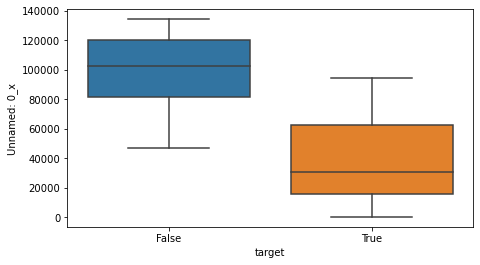

BinaryNumTarget


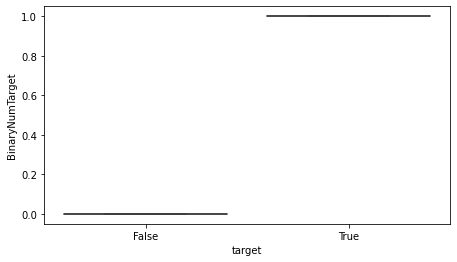

followers_count


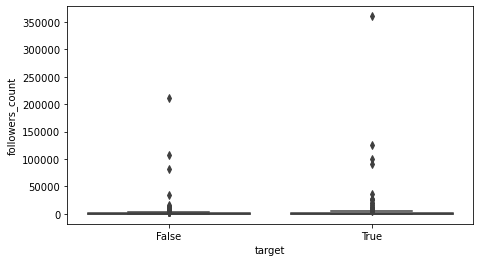

friends_count


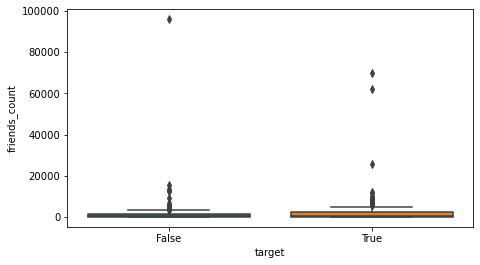

favourites_count


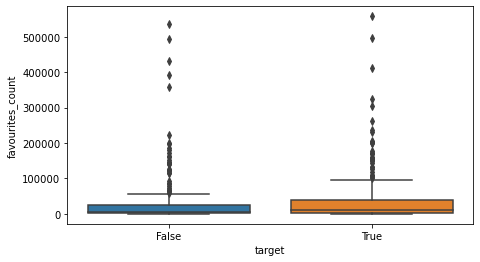

statuses_count


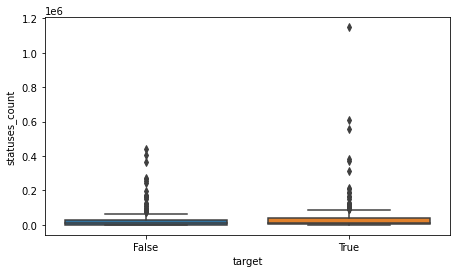

listed_count


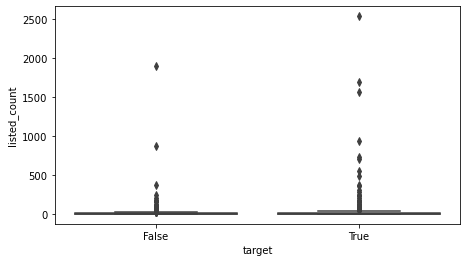

following


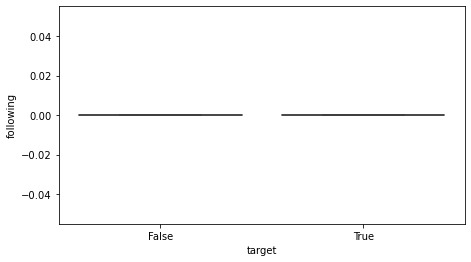

BotScore


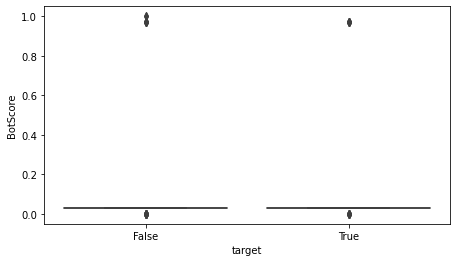

BotScoreBinary


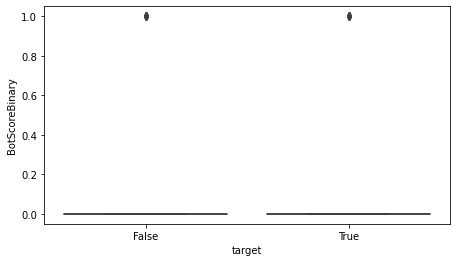

cred


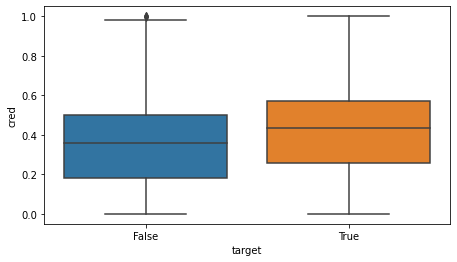

normalize_influence


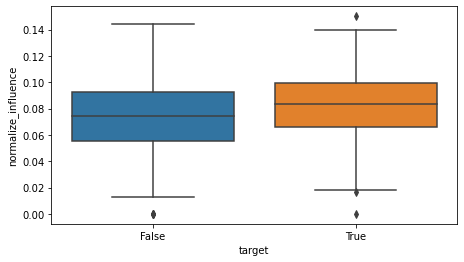

mentions


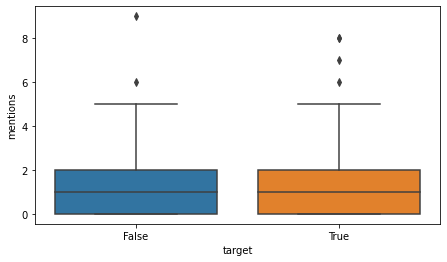

quotes


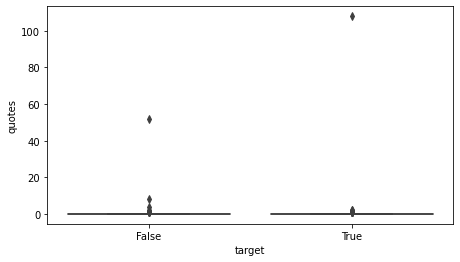

replies


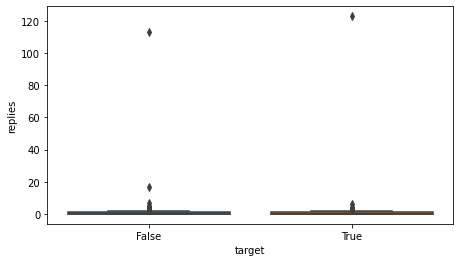

retweets


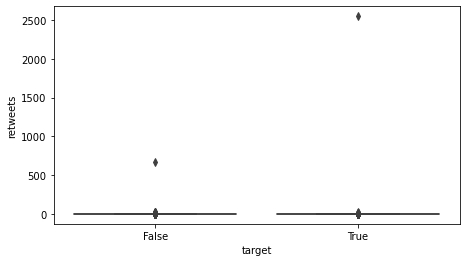

favourites


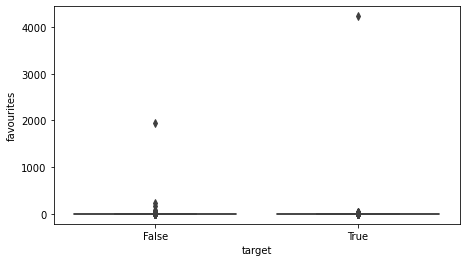

hashtags


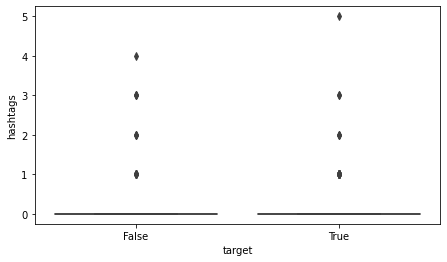

URLs


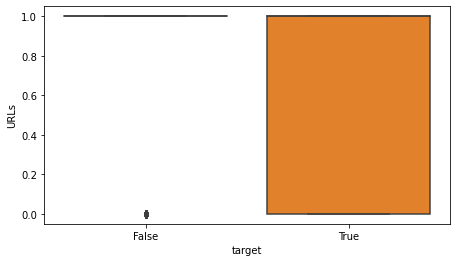

unique_count


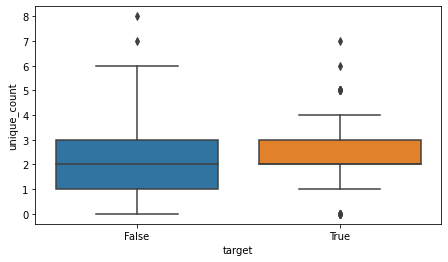

total_count


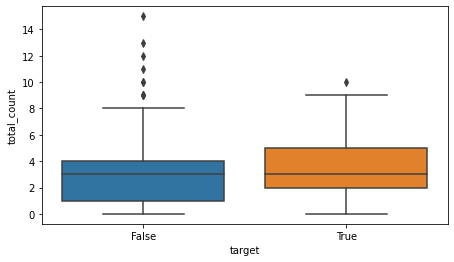

ORG_percentage


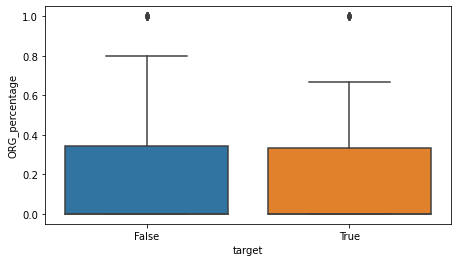

NORP_percentage


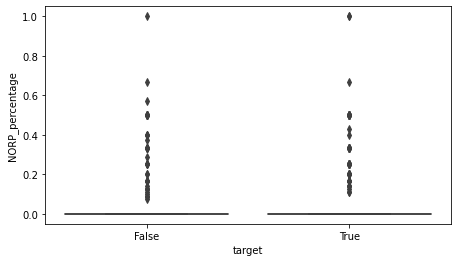

GPE_percentage


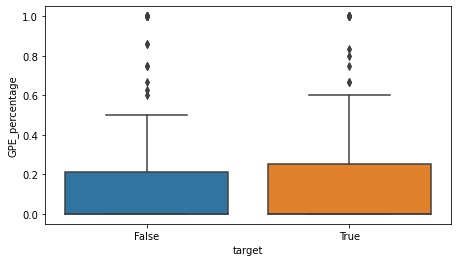

PERSON_percentage


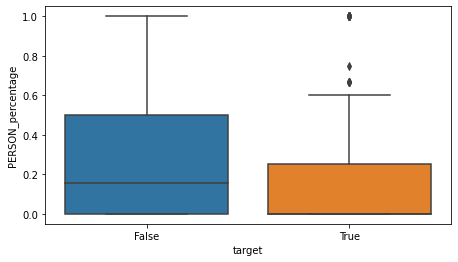

MONEY_percentage


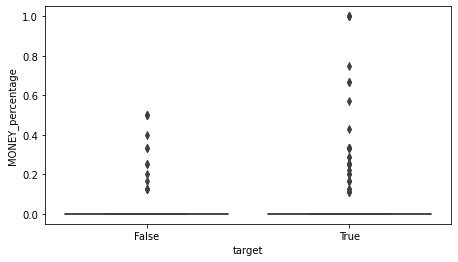

DATE_percentage


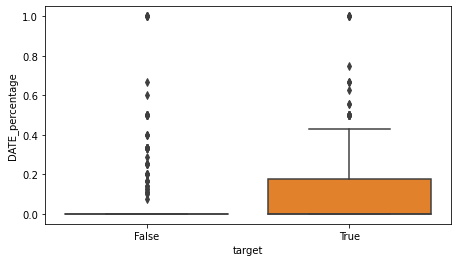

CARDINAL_percentage


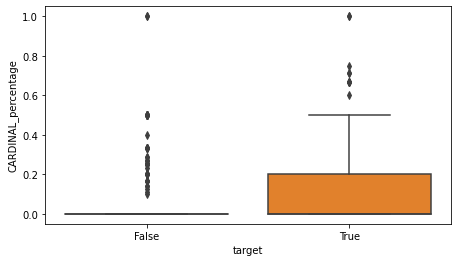

PERCENT_percentage


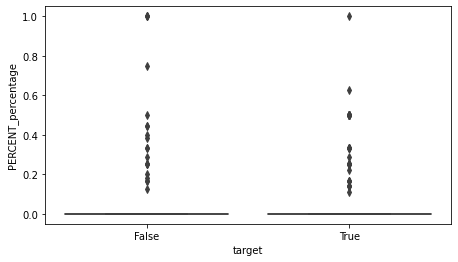

ORDINAL_percentage


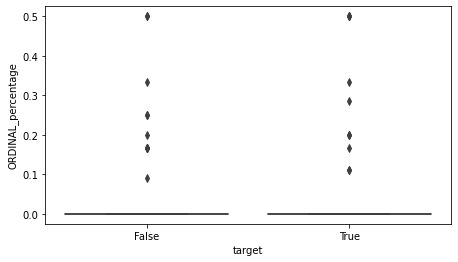

FAC_percentage


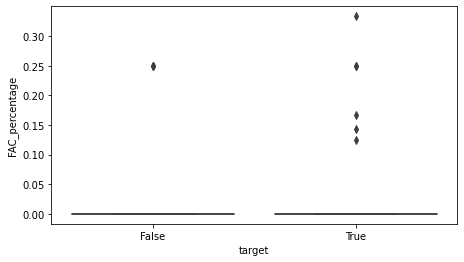

LAW_percentage


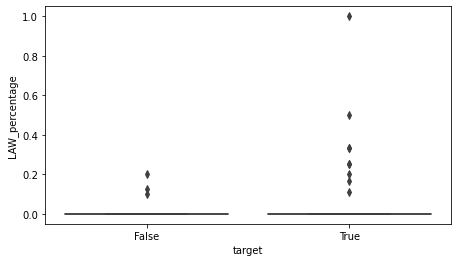

PRODUCT_percentage


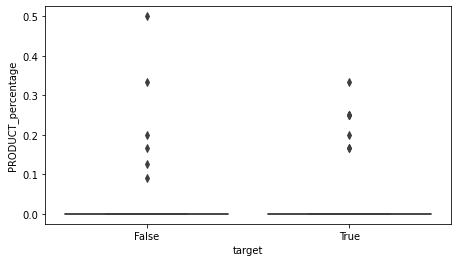

EVENT_percentage


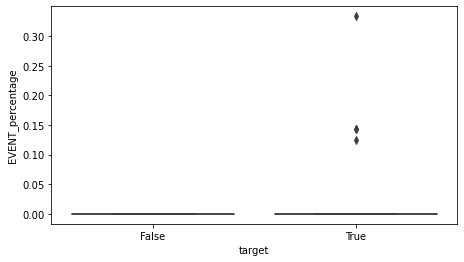

TIME_percentage


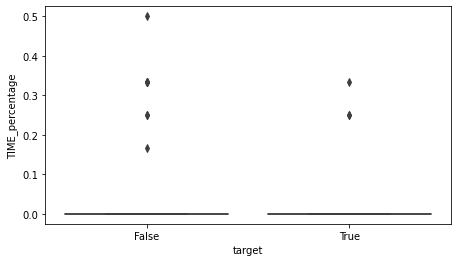

LOC_percentage


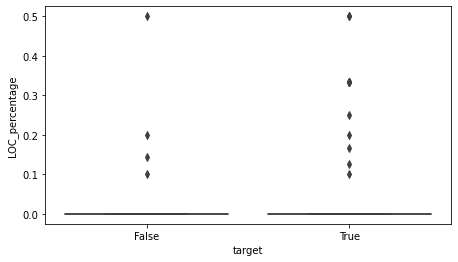

WORK_OF_ART_percentage


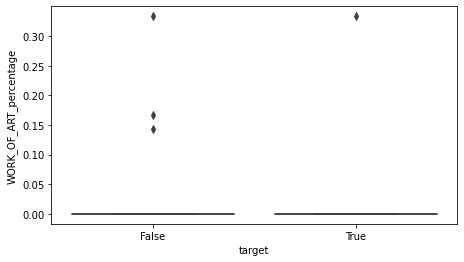

QUANTITY_percentage


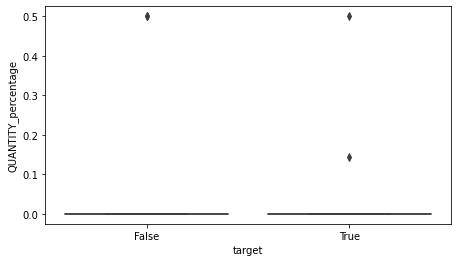

LANGUAGE_percentage


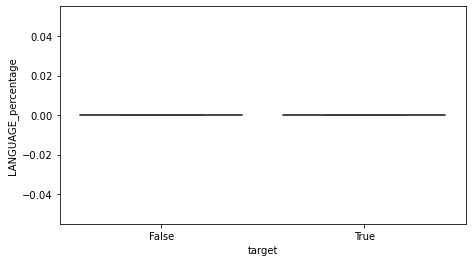

Word count


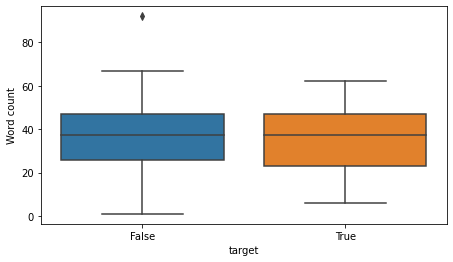

Max word length


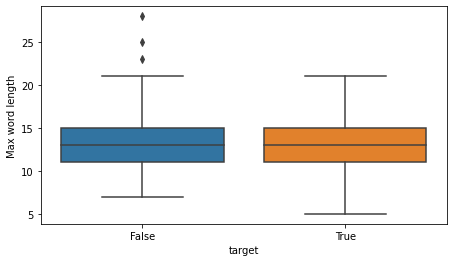

Min word length


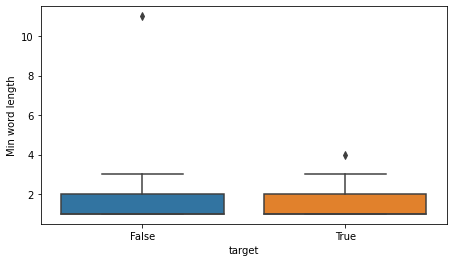

Average word length


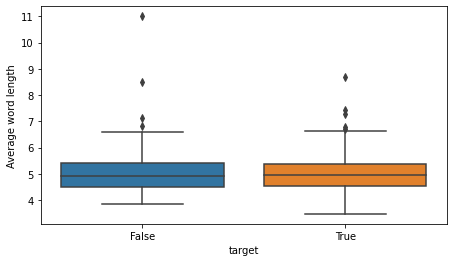

present_verbs


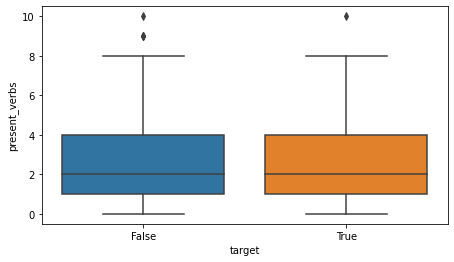

past_verbs


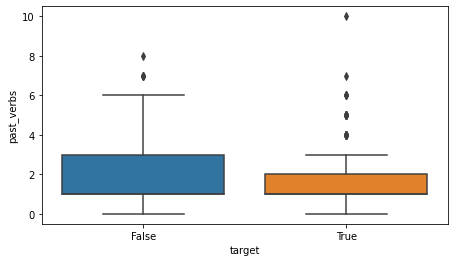

adjectives


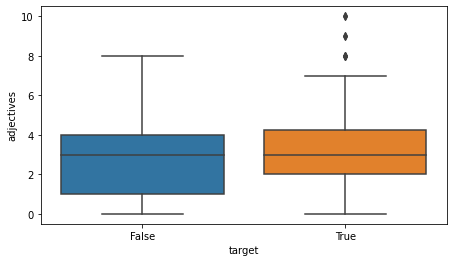

adverbs


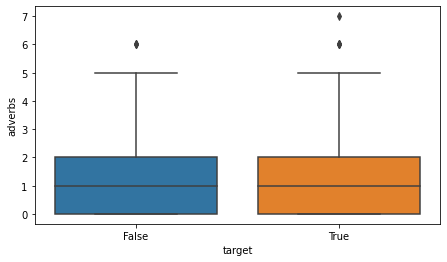

adpositions


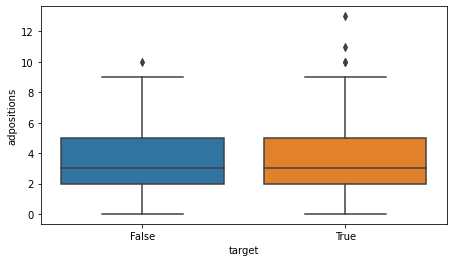

pronouns


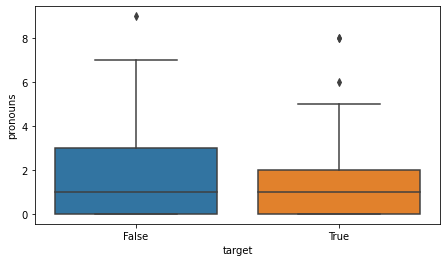

TOs


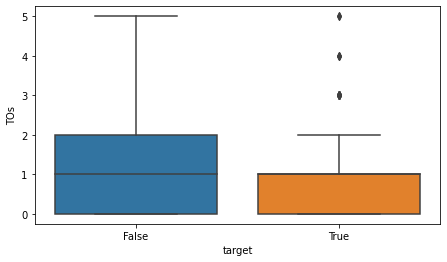

determiners


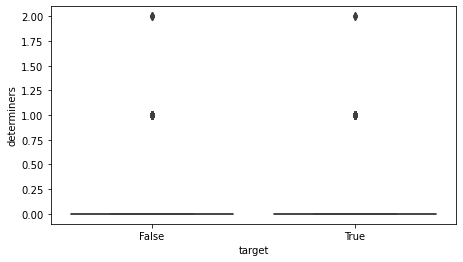

conjunctions


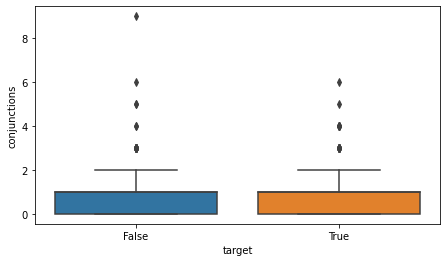

dots


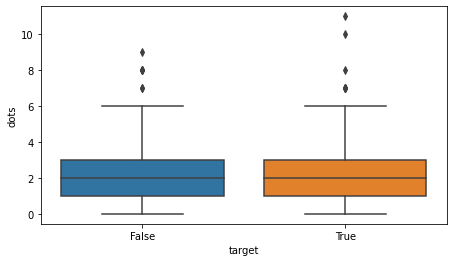

exclamation


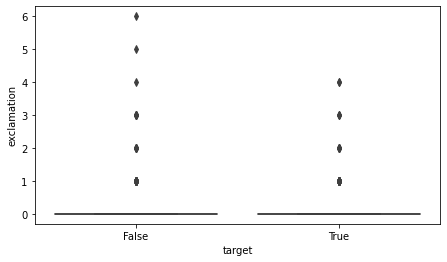

questions


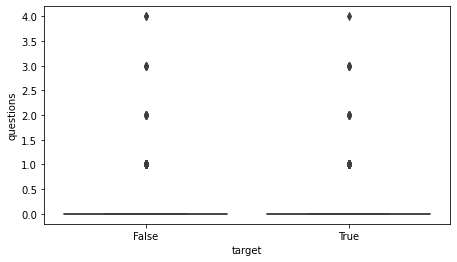

ampersand


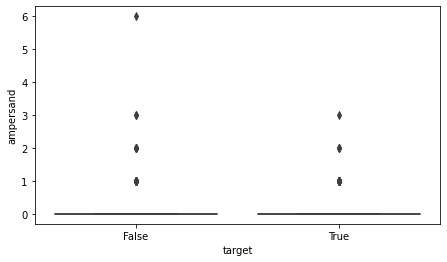

capitals


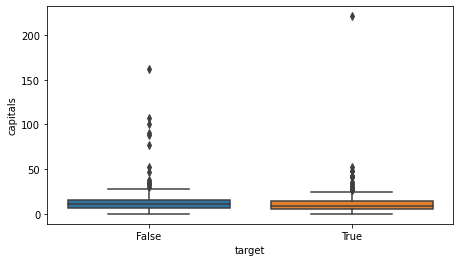

digits


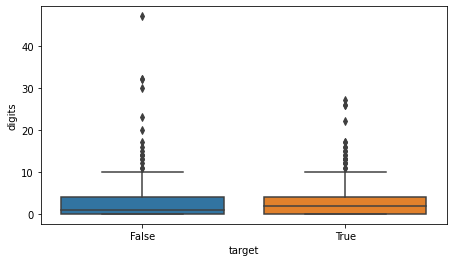

long_word_freq


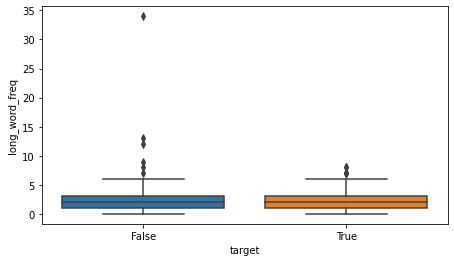

short_word_freq


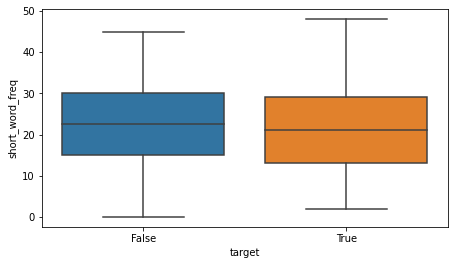

Unnamed: 0_y


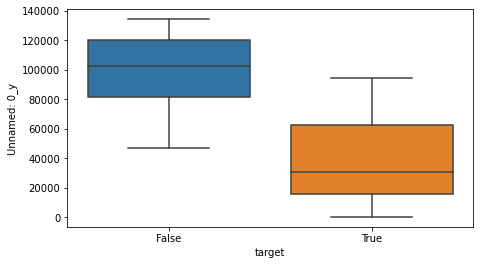

In [35]:
col_list = data_s.select_dtypes(include=np.number).columns.tolist()
for col in col_list:
    print(col)
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)
    sns.boxplot(x=data_s['target'], y=data_s[col])
    plt.show()

[Text(0.5, 0, 'Target'),
 Text(0, 0.5, 'Number of Unique Complex Words'),
 Text(0.5, 1.0, 'Number of Unique Complex Words by Target')]

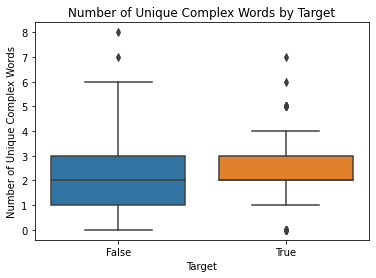

In [36]:
g1= sns.boxplot(x=data_s['target'], y=data_s['unique_count'])
g1.set(xlabel ="Target", ylabel = "Number of Unique Complex Words", title ='Number of Unique Complex Words by Target')

[Text(0.5, 0, 'Target'),
 Text(0, 0.5, 'Person Percentage'),
 Text(0.5, 1.0, 'Person Percentage by Target')]

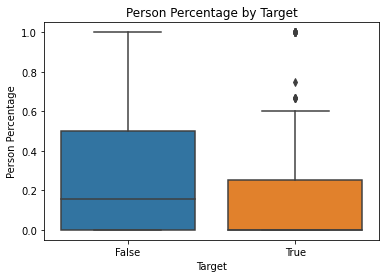

In [37]:
g2= sns.boxplot(x=data_s['target'], y=data_s['PERSON_percentage'])
g2.set(xlabel ="Target", ylabel = "Person Percentage", title ='Person Percentage by Target')

(0.0, 10000.0)

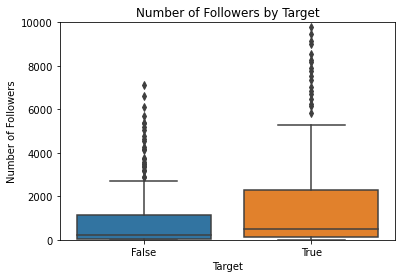

In [38]:
import matplotlib.pyplot as plt
g3= sns.boxplot(x=data_s['target'], y=data_s['followers_count'])
g3.set(xlabel ="Target", ylabel = "Number of Followers", title ='Number of Followers by Target')
plt.ylim(0, 10000)

[Text(0.5, 0, 'Target'),
 Text(0, 0.5, 'Cardinal Percentage'),
 Text(0.5, 1.0, 'Cardinal Percentage by Target')]

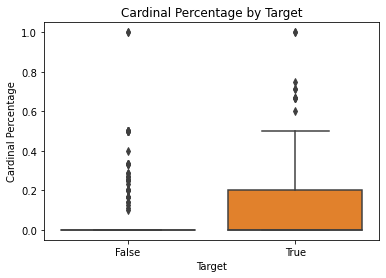

In [39]:
g4= sns.boxplot(x=data_s['target'], y=data_s['CARDINAL_percentage'])
g4.set(xlabel ="Target", ylabel = "Cardinal Percentage", title ='Cardinal Percentage by Target')

<AxesSubplot:xlabel='adjectives', ylabel='unique_count'>

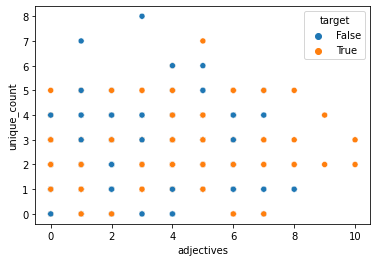

In [40]:
sns.scatterplot(x = data_s['adjectives'], y = data_s['unique_count'], hue = data_s['target'])

<AxesSubplot:xlabel='followers_count', ylabel='favourites'>

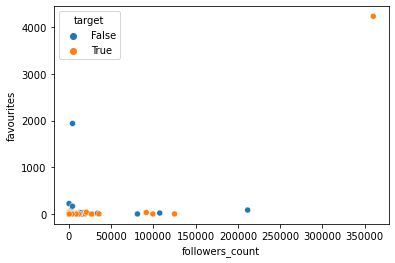

In [41]:
sns.scatterplot(x = data_s['followers_count'], y = data_s['favourites'], hue = data_s['target'])

# Modeling Done on Similarly-Balanced Training and Testing Data

The testing data: x_test and y_test. The training data: x_train and y_train. 

In [42]:
x_train

,Unnamed: 0_x,majority_target,statement,BinaryNumTarget,tweet,followers_count,friends_count,favourites_count,statuses_count,listed_count,following,embeddings,BotScore,BotScoreBinary,cred,normalize_influence,mentions,quotes,replies,retweets,favourites,hashtags,URLs,unique_count,total_count,ORG_percentage,NORP_percentage,GPE_percentage,PERSON_percentage,MONEY_percentage,DATE_percentage,CARDINAL_percentage,PERCENT_percentage,ORDINAL_percentage,FAC_percentage,LAW_percentage,PRODUCT_percentage,EVENT_percentage,TIME_percentage,LOC_percentage,WORK_OF_ART_percentage,QUANTITY_percentage,LANGUAGE_percentage,Word count,Max word length,Min word length,Average word length,present_verbs,past_verbs,adjectives,adverbs,adpositions,pronouns,TOs,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq,Unnamed: 0_y,author,manual_keywords
132001,132001,False,The United Nations new world order agenda will...,0.0,"@goodblackdude @PZonLAKEontario ""No one will e...",1460.0,4734.0,1464.0,14661.0,8.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.235712,0.093857,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3,4,0.000000,0.0,0.250000,0.500000,0.0,0.00,0.000000,0.00,0.0,0.25,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,16,1,5.791667,0,0,2,1,2,0,0,0,1,0,0,0,0,18,1,3,12,132001,Patrick Orsagos,"United Nations, new world order"
58392,58392,True,"""There are more African American men in prison...",1.0,@ketkeith1969 @FleetGotHeat @lsadival @Reyani_...,29.0,546.0,106.0,617.0,0.0,0.0,[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.00,0.0,0.050435,0.050233,4.0,0.0,1.0,0.0,0.0,0.0,1.0,4,4,0.250000,0.0,0.000000,0.250000,0.0,0.25,0.000000,0.00,0.0,0.00,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18,13,1,6.111111,2,1,3,1,2,0,1,0,0,0,1,0,0,14,0,4,10,58392,Katie Mulvaney,"more,african american, prison"
106892,106892,False,Democrats spent 4 years refusing to acknowledg...,0.0,@FrankLuntz was Obama's legacy greatly diminis...,960.0,542.0,3996.0,1816.0,21.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.639148,0.086902,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.000000,0.0,1.000000,0.000000,0.0,0.00,0.000000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37,16,1,5.189189,3,1,2,1,8,3,0,0,0,2,0,1,0,11,2,4,26,106892,Hayat Norimine,"Democrats, 4 years, refusing"
22399,22399,True,"""More than half of Planned Parenthood faciliti...",1.0,@womensmarch @WomensMarchY There are bills goi...,462.0,1312.0,9106.0,5538.0,9.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.260428,0.081221,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2,3,0.000000,0.0,0.666667,0.000000,0.0,0.00,0.333333,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,11,1,4.307692,4,2,1,5,5,2,1,0,1,6,1,1,0,9,7,1,33,22399,Sarah Waychoff,"Planned Parenthod, rural, underserved"
101069,101069,False,Nancy Pelosi is no longer the Speaker of the H...,0.0,@DiaryOtdGirl @mtgreenee ...She also liked pos...,5.0,8.0,685.0,1706.0,0.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1]],0.03,0.0,0.384615,0.034706,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0.000000,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,11,1,4.736842,2,1,4,1,3,1,1,0,1,1,0,0,0,1,0,1,11,101069,Samantha Putterman,"Nancy Pelosi, no longer, Speaker"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56082,56082,False,"""The person that shot Ashli Babbitt boom rig...",0.0,@LesterHoltNBC TERRIBLE idea to interview the ...,869.0,1078.0,31192.0,43621.0,34.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.446328,0.089924,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3,4,0.500000,0.0,0.000000,0.000000,0.0,0.00,0.250000,0.25,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33,13,1,5.454545,0,0,0,0,6,0,0,0,1,0,1,0,0,21,8,2,16,56082,Louis Jacobson,"Ashli Babbitt, no reason"
117542,117542,False,Says Joe Biden stays in his basement.,0.0,@RedState I have not trust

In [43]:
y_train

,target
132001,False
58392,True
106892,False
22399,True
101069,False
...,...
56082,False
117542,False
41676,True
105784,False


In [44]:
d_train_c = pd.merge(x_train, y_train, left_index=True, right_index=True)

In [45]:
d_train_c

,Unnamed: 0_x,majority_target,statement,BinaryNumTarget,tweet,followers_count,friends_count,favourites_count,statuses_count,listed_count,following,embeddings,BotScore,BotScoreBinary,cred,normalize_influence,mentions,quotes,replies,retweets,favourites,hashtags,URLs,unique_count,total_count,ORG_percentage,NORP_percentage,GPE_percentage,PERSON_percentage,MONEY_percentage,DATE_percentage,CARDINAL_percentage,PERCENT_percentage,ORDINAL_percentage,FAC_percentage,LAW_percentage,PRODUCT_percentage,EVENT_percentage,TIME_percentage,LOC_percentage,WORK_OF_ART_percentage,QUANTITY_percentage,LANGUAGE_percentage,Word count,Max word length,Min word length,Average word length,present_verbs,past_verbs,adjectives,adverbs,adpositions,pronouns,TOs,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq,Unnamed: 0_y,author,manual_keywords,target
132001,132001,False,The United Nations new world order agenda will...,0.0,"@goodblackdude @PZonLAKEontario ""No one will e...",1460.0,4734.0,1464.0,14661.0,8.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.235712,0.093857,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3,4,0.000000,0.0,0.250000,0.500000,0.0,0.00,0.000000,0.00,0.0,0.25,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,16,1,5.791667,0,0,2,1,2,0,0,0,1,0,0,0,0,18,1,3,12,132001,Patrick Orsagos,"United Nations, new world order",False
58392,58392,True,"""There are more African American men in prison...",1.0,@ketkeith1969 @FleetGotHeat @lsadival @Reyani_...,29.0,546.0,106.0,617.0,0.0,0.0,[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.00,0.0,0.050435,0.050233,4.0,0.0,1.0,0.0,0.0,0.0,1.0,4,4,0.250000,0.0,0.000000,0.250000,0.0,0.25,0.000000,0.00,0.0,0.00,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18,13,1,6.111111,2,1,3,1,2,0,1,0,0,0,1,0,0,14,0,4,10,58392,Katie Mulvaney,"more,african american, prison",True
106892,106892,False,Democrats spent 4 years refusing to acknowledg...,0.0,@FrankLuntz was Obama's legacy greatly diminis...,960.0,542.0,3996.0,1816.0,21.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.639148,0.086902,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.000000,0.0,1.000000,0.000000,0.0,0.00,0.000000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37,16,1,5.189189,3,1,2,1,8,3,0,0,0,2,0,1,0,11,2,4,26,106892,Hayat Norimine,"Democrats, 4 years, refusing",False
22399,22399,True,"""More than half of Planned Parenthood faciliti...",1.0,@womensmarch @WomensMarchY There are bills goi...,462.0,1312.0,9106.0,5538.0,9.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.260428,0.081221,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2,3,0.000000,0.0,0.666667,0.000000,0.0,0.00,0.333333,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,11,1,4.307692,4,2,1,5,5,2,1,0,1,6,1,1,0,9,7,1,33,22399,Sarah Waychoff,"Planned Parenthod, rural, underserved",True
101069,101069,False,Nancy Pelosi is no longer the Speaker of the H...,0.0,@DiaryOtdGirl @mtgreenee ...She also liked pos...,5.0,8.0,685.0,1706.0,0.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1]],0.03,0.0,0.384615,0.034706,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0.000000,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,11,1,4.736842,2,1,4,1,3,1,1,0,1,1,0,0,0,1,0,1,11,101069,Samantha Putterman,"Nancy Pelosi, no longer, Speaker",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56082,56082,False,"""The person that shot Ashli Babbitt boom rig...",0.0,@LesterHoltNBC TERRIBLE idea to interview the ...,869.0,1078.0,31192.0,43621.0,34.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],0.03,0.0,0.446328,0.089924,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3,4,0.500000,0.0,0.000000,0.000000,0.0,0.00,0.250000,0.25,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33,13,1,5.454545,0,0,0,0,6,0,0,0,1,0,1,0,0,21,8,2,16,56082,Louis Jacobson,"Ashli Babbitt, no reason",False
117542,117542,False,Says Joe Biden stays in

Dropping fields that are not going to be part of our analysis. 

Removing 'cred' ("credibility score") due to covariance. There appears to be covariance between 'mentions' and 'quotes' so we are removing 'mentions'. In addition, there appears to be covariance between 'followers_count' and 'friends_count' so we are removing 'friends_count' eg "Number of friends" or people that this account follows.

Removing 'following' because they're all 0. 

In [46]:
d_train_c2 = d_train_c.loc[:, ~d_train_c.columns.isin(['Unnamed: 0_x', 'statement', 'majority_target',
                                                       'BinaryNumTarget', 'tweet', 'embeddings', 'Unnamed: 0_y', 
                                                      'author', 'manual_keywords',
                                                    'BotScoreBinary',
                                                    'Word count',
                                                    'listed_count',
                                                    'mentions',
                                                    'following',
                                                    'favourites_count',
                                                    'friends_count',
                                                    'normalize_influence',
                                                    'statuses_count',
                                                     'cred'])]
d_train_c2

,followers_count,BotScore,quotes,replies,retweets,favourites,hashtags,URLs,unique_count,total_count,ORG_percentage,NORP_percentage,GPE_percentage,PERSON_percentage,MONEY_percentage,DATE_percentage,CARDINAL_percentage,PERCENT_percentage,ORDINAL_percentage,FAC_percentage,LAW_percentage,PRODUCT_percentage,EVENT_percentage,TIME_percentage,LOC_percentage,WORK_OF_ART_percentage,QUANTITY_percentage,LANGUAGE_percentage,Max word length,Min word length,Average word length,present_verbs,past_verbs,adjectives,adverbs,adpositions,pronouns,TOs,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq,target
132001,1460.0,0.03,0.0,0.0,0.0,0.0,0.0,1.0,3,4,0.000000,0.0,0.250000,0.500000,0.0,0.00,0.000000,0.00,0.0,0.25,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16,1,5.791667,0,0,2,1,2,0,0,0,1,0,0,0,0,18,1,3,12,False
58392,29.0,0.00,0.0,1.0,0.0,0.0,0.0,1.0,4,4,0.250000,0.0,0.000000,0.250000,0.0,0.25,0.000000,0.00,0.0,0.00,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,1,6.111111,2,1,3,1,2,0,1,0,0,0,1,0,0,14,0,4,10,True
106892,960.0,0.03,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.000000,0.0,1.000000,0.000000,0.0,0.00,0.000000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16,1,5.189189,3,1,2,1,8,3,0,0,0,2,0,1,0,11,2,4,26,False
22399,462.0,0.03,0.0,0.0,0.0,0.0,0.0,1.0,2,3,0.000000,0.0,0.666667,0.000000,0.0,0.00,0.333333,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,1,4.307692,4,2,1,5,5,2,1,0,1,6,1,1,0,9,7,1,33,True
101069,5.0,0.03,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0.000000,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,1,4.736842,2,1,4,1,3,1,1,0,1,1,0,0,0,1,0,1,11,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56082,869.0,0.03,0.0,0.0,0.0,1.0,0.0,1.0,3,4,0.500000,0.0,0.000000,0.000000,0.0,0.00,0.250000,0.25,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,1,5.454545,0,0,0,0,6,0,0,0,1,0,1,0,0,21,8,2,16,False
117542,24.0,0.03,0.0,0.0,0.0,0.0,0.0,1.0,2,4,0.250000,0.0,0.000000,0.750000,0.0,0.00,0.000000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,2,4.920000,7,0,5,0,6,3,1,1,1,4,0,2,0,15,2,3,31,False
41676,2092.0,0.03,0.0,2.0,0.0,0.0,0.0,0.0,3,4,0.250000,0.0,0.250000,0.500000,0.0,0.00,0.000000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,1,5.300000,0,0,2,1,1,0,0,0,0,1,0,0,0,11,0,0,10,True
105784,758.0,0.03,0.0,0.0,1.0,4.0,0.0,0.0,1,1,1.000000,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,1,6.285714,1,0,1,1,0,1,0,0,0,1,0,0,0,2,0,1,2,False


In [47]:
d_train_c2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 132001 to 6905
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   followers_count         350 non-null    float64
 1   BotScore                350 non-null    float64
 2   quotes                  350 non-null    float64
 3   replies                 350 non-null    float64
 4   retweets                350 non-null    float64
 5   favourites              350 non-null    float64
 6   hashtags                350 non-null    float64
 7   URLs                    350 non-null    float64
 8   unique_count            350 non-null    int64  
 9   total_count             350 non-null    int64  
 10  ORG_percentage          350 non-null    float64
 11  NORP_percentage         350 non-null    float64
 12  GPE_percentage          350 non-null    float64
 13  PERSON_percentage       350 non-null    float64
 14  MONEY_percentage        350 non-null

In [48]:
d_train_c2.reset_index(drop=True, inplace=True)
d_train_c2

,followers_count,BotScore,quotes,replies,retweets,favourites,hashtags,URLs,unique_count,total_count,ORG_percentage,NORP_percentage,GPE_percentage,PERSON_percentage,MONEY_percentage,DATE_percentage,CARDINAL_percentage,PERCENT_percentage,ORDINAL_percentage,FAC_percentage,LAW_percentage,PRODUCT_percentage,EVENT_percentage,TIME_percentage,LOC_percentage,WORK_OF_ART_percentage,QUANTITY_percentage,LANGUAGE_percentage,Max word length,Min word length,Average word length,present_verbs,past_verbs,adjectives,adverbs,adpositions,pronouns,TOs,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq,target
0,1460.0,0.03,0.0,0.0,0.0,0.0,0.0,1.0,3,4,0.000000,0.0,0.250000,0.500000,0.0,0.00,0.000000,0.00,0.0,0.25,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16,1,5.791667,0,0,2,1,2,0,0,0,1,0,0,0,0,18,1,3,12,False
1,29.0,0.00,0.0,1.0,0.0,0.0,0.0,1.0,4,4,0.250000,0.0,0.000000,0.250000,0.0,0.25,0.000000,0.00,0.0,0.00,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,1,6.111111,2,1,3,1,2,0,1,0,0,0,1,0,0,14,0,4,10,True
2,960.0,0.03,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.000000,0.0,1.000000,0.000000,0.0,0.00,0.000000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16,1,5.189189,3,1,2,1,8,3,0,0,0,2,0,1,0,11,2,4,26,False
3,462.0,0.03,0.0,0.0,0.0,0.0,0.0,1.0,2,3,0.000000,0.0,0.666667,0.000000,0.0,0.00,0.333333,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,1,4.307692,4,2,1,5,5,2,1,0,1,6,1,1,0,9,7,1,33,True
4,5.0,0.03,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0.000000,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,1,4.736842,2,1,4,1,3,1,1,0,1,1,0,0,0,1,0,1,11,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,869.0,0.03,0.0,0.0,0.0,1.0,0.0,1.0,3,4,0.500000,0.0,0.000000,0.000000,0.0,0.00,0.250000,0.25,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,1,5.454545,0,0,0,0,6,0,0,0,1,0,1,0,0,21,8,2,16,False
346,24.0,0.03,0.0,0.0,0.0,0.0,0.0,1.0,2,4,0.250000,0.0,0.000000,0.750000,0.0,0.00,0.000000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,2,4.920000,7,0,5,0,6,3,1,1,1,4,0,2,0,15,2,3,31,False
347,2092.0,0.03,0.0,2.0,0.0,0.0,0.0,0.0,3,4,0.250000,0.0,0.250000,0.500000,0.0,0.00,0.000000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,1,5.300000,0,0,2,1,1,0,0,0,0,1,0,0,0,11,0,0,10,True
348,758.0,0.03,0.0,0.0,1.0,4.0,0.0,0.0,1,1,1.000000,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,1,6.285714,1,0,1,1,0,1,0,0,0,1,0,0,0,2,0,1,2,False


# Modeling

# LDA 5 Variables

In [126]:
class LDA():
    def __init__(self, dataset, class_var, the_features:list, priors = None):  
        n_class = len(dataset[class_var].unique())
        if priors is None:
            priors = np.repeat(1/n_class, n_class)
        self.priors =  np.asarray(priors)
        self.the_features=the_features 
        self.means = dataset.groupby(class_var)[self.the_features].mean() 
        self.sigma = dataset[the_features].cov()  
        self.class_var = class_var
        self.training_data = dataset
    def predict_probs(self, data = None):
        if data is None:
            data = self.training_data
        data_temp = data.drop(self.class_var, axis = 1)[self.the_features]   
        dens_list = []
        col_names = []
        for ind, row in self.means.iterrows():
            col_names.append(ind)
            dens_list.append(multivariate_normal.pdf(data_temp, mean = np.asarray(row), cov = self.sigma))
        dens_list = pd.DataFrame(np.transpose(np.vstack(dens_list)),columns= col_names)
        dens_list = dens_list.mul(self.priors, axis=1)
        dens_list = dens_list.div(dens_list.sum(axis=1), axis=0)
        dens_list['True Class'] = data[self.class_var]
        return dens_list 
    def predict_MAP(self, data = None):        
        if data is None:
            data = self.training_data
        dens_list = self.predict_probs(data).drop('True Class', axis = 1)
        map_list = dens_list.idxmax(axis = 1)
        maps = {'MAP Class': map_list}
        maps = pd.DataFrame(maps)
        maps['True Class'] = data[self.class_var].reset_index(drop=True)
        return maps
    def misclass_rate(self, data = None):
        if data is None:
            data = self.training_data
        maps = self.predict_MAP(data = data)
        maps['Mis_class'] = maps['MAP Class']  == maps['True Class']
        mis_class =  1 - maps['Mis_class'].mean()
        return mis_class
    def misclass_xtabs(self, data = None):
        if data is None:
            data = self.training_data
        maps = self.predict_MAP(data = data)
        xtabs = pd.crosstab(maps['MAP Class'], maps['True Class'])        
        return xtabs
    def misclass_pairplot(self, data = None):
        if data is None:
            data = self.training_data
        maps = self.predict_MAP(data = data)
        temp_dat = data.copy(deep = True)
        temp_dat['Mis-Classified'] = maps['MAP Class']  != maps['True Class']
        plot = sns.pairplot(temp_dat,hue="Mis-Classified", height = 1.5, aspect = 1.5)   
        return plot

In [45]:
cols = list(d_train_c2.columns.values)
cols.remove('target')
combos = list(combinations(cols, 5))

We are going to run 1,712,304 types of models based on using 5 features in each model. 

In [46]:
len(combos)

1712304

In [47]:
d_train_c2

,followers_count,BotScore,quotes,replies,retweets,favourites,hashtags,URLs,unique_count,total_count,ORG_percentage,NORP_percentage,GPE_percentage,PERSON_percentage,MONEY_percentage,DATE_percentage,CARDINAL_percentage,PERCENT_percentage,ORDINAL_percentage,FAC_percentage,LAW_percentage,PRODUCT_percentage,EVENT_percentage,TIME_percentage,LOC_percentage,WORK_OF_ART_percentage,QUANTITY_percentage,LANGUAGE_percentage,Max word length,Min word length,Average word length,present_verbs,past_verbs,adjectives,adverbs,adpositions,pronouns,TOs,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq,target
0,1460.0,0.03,0.0,0.0,0.0,0.0,0.0,1.0,3,4,0.000000,0.0,0.250000,0.500000,0.0,0.00,0.000000,0.00,0.0,0.25,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16,1,5.791667,0,0,2,1,2,0,0,0,1,0,0,0,0,18,1,3,12,False
1,29.0,0.00,0.0,1.0,0.0,0.0,0.0,1.0,4,4,0.250000,0.0,0.000000,0.250000,0.0,0.25,0.000000,0.00,0.0,0.00,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,1,6.111111,2,1,3,1,2,0,1,0,0,0,1,0,0,14,0,4,10,True
2,960.0,0.03,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.000000,0.0,1.000000,0.000000,0.0,0.00,0.000000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16,1,5.189189,3,1,2,1,8,3,0,0,0,2,0,1,0,11,2,4,26,False
3,462.0,0.03,0.0,0.0,0.0,0.0,0.0,1.0,2,3,0.000000,0.0,0.666667,0.000000,0.0,0.00,0.333333,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,1,4.307692,4,2,1,5,5,2,1,0,1,6,1,1,0,9,7,1,33,True
4,5.0,0.03,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0.000000,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,1,4.736842,2,1,4,1,3,1,1,0,1,1,0,0,0,1,0,1,11,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,869.0,0.03,0.0,0.0,0.0,1.0,0.0,1.0,3,4,0.500000,0.0,0.000000,0.000000,0.0,0.00,0.250000,0.25,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,1,5.454545,0,0,0,0,6,0,0,0,1,0,1,0,0,21,8,2,16,False
346,24.0,0.03,0.0,0.0,0.0,0.0,0.0,1.0,2,4,0.250000,0.0,0.000000,0.750000,0.0,0.00,0.000000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,2,4.920000,7,0,5,0,6,3,1,1,1,4,0,2,0,15,2,3,31,False
347,2092.0,0.03,0.0,2.0,0.0,0.0,0.0,0.0,3,4,0.250000,0.0,0.250000,0.500000,0.0,0.00,0.000000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,1,5.300000,0,0,2,1,1,0,0,0,0,1,0,0,0,11,0,0,10,True
348,758.0,0.03,0.0,0.0,1.0,4.0,0.0,0.0,1,1,1.000000,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,1,6.285714,1,0,1,1,0,1,0,0,0,1,0,0,0,2,0,1,2,False


In [48]:
data['target'].value_counts(normalize=True)

True     0.513644
False    0.486356
Name: target, dtype: float64

Setting priors based on the whole data set with 0.49 False and 0.51 True.

In [50]:
combos_2=combos[0:1000]
combos_2

[('followers_count', 'BotScore', 'quotes', 'replies', 'retweets'),
 ('followers_count', 'BotScore', 'quotes', 'replies', 'favourites'),
 ('followers_count', 'BotScore', 'quotes', 'replies', 'hashtags'),
 ('followers_count', 'BotScore', 'quotes', 'replies', 'URLs'),
 ('followers_count', 'BotScore', 'quotes', 'replies', 'unique_count'),
 ('followers_count', 'BotScore', 'quotes', 'replies', 'total_count'),
 ('followers_count', 'BotScore', 'quotes', 'replies', 'ORG_percentage'),
 ('followers_count', 'BotScore', 'quotes', 'replies', 'NORP_percentage'),
 ('followers_count', 'BotScore', 'quotes', 'replies', 'GPE_percentage'),
 ('followers_count', 'BotScore', 'quotes', 'replies', 'PERSON_percentage'),
 ('followers_count', 'BotScore', 'quotes', 'replies', 'MONEY_percentage'),
 ('followers_count', 'BotScore', 'quotes', 'replies', 'DATE_percentage'),
 ('followers_count', 'BotScore', 'quotes', 'replies', 'CARDINAL_percentage'),
 ('followers_count', 'BotScore', 'quotes', 'replies', 'PERCENT_percent

In [51]:
from scipy.stats import multivariate_normal
def run_models_lda(data_type): 
    global LDA_models
    global rate_models
    global subsetsWithCollinearity
    LDA_models = []
    rate_models = []
    subsetsWithCollinearity=[]
    for c in combos:
        c = list(c)
        try:
            LDA_m = LDA(data_type, 'target', c, priors = [0.49, 0.51])
            LDA_m.predict_probs(data_type.loc[0:349,:])
            LDA_m.predict_MAP()
            rate = LDA_m.misclass_rate()
            LDA_models.append([c, rate])
            rate_models.append(rate)
        except np.linalg.LinAlgError as e:
            subsetsWithCollinearity.append(c)
            continue
    return LDA_models

In [52]:
run_models_lda(d_train_c2)

[[['followers_count', 'quotes', 'replies', 'favourites', 'hashtags'],
  0.48571428571428577],
 [['followers_count', 'quotes', 'replies', 'favourites', 'URLs'],
  0.5171428571428571],
 [['followers_count', 'quotes', 'replies', 'favourites', 'unique_count'],
  0.48857142857142855],
 [['followers_count', 'quotes', 'replies', 'favourites', 'total_count'],
  0.5057142857142858],
 [['followers_count', 'quotes', 'replies', 'favourites', 'Max word length'],
  0.46285714285714286],
 [['followers_count', 'quotes', 'replies', 'favourites', 'Min word length'],
  0.5028571428571429],
 [['followers_count',
   'quotes',
   'replies',
   'favourites',
   'Average word length'],
  0.5028571428571429],
 [['followers_count', 'quotes', 'replies', 'favourites', 'present_verbs'],
  0.4228571428571428],
 [['followers_count', 'quotes', 'replies', 'favourites', 'past_verbs'],
  0.44285714285714284],
 [['followers_count', 'quotes', 'replies', 'favourites', 'adjectives'],
  0.4685714285714285],
 [['followers_cou

In [53]:
len(subsetsWithCollinearity)

321103

In [54]:
rate_min_train = min(rate_models)
rate_min_train

0.32285714285714284

In [55]:
combo_min_train = [sublist[0] for sublist in LDA_models if sublist[1] == rate_min_train]
combo_min_train

[['unique_count',
  'PERSON_percentage',
  'CARDINAL_percentage',
  'adjectives',
  'pronouns'],
 ['NORP_percentage',
  'PERSON_percentage',
  'CARDINAL_percentage',
  'adjectives',
  'pronouns']]

The misclassification rate using the training data is 0.32285714285714284. There are 2 combinations of features that all lead to this result, which are listed below. 
[['unique_count',
  'PERSON_percentage',
  'CARDINAL_percentage',
  'adjectives',
  'pronouns'],
 ['NORP_percentage',
  'PERSON_percentage',
  'CARDINAL_percentage',
  'adjectives',
  'pronouns']]

In [58]:
class LDA():
    def __init__(self, dataset, class_var, the_features:list, priors = None):  
        n_class = len(dataset[class_var].unique())
        if priors is None:
            priors = np.repeat(1/n_class, n_class)
        self.priors =  np.asarray(priors)
        self.the_features=the_features 
        self.means = dataset.groupby(class_var)[self.the_features].mean() 
        self.sigma = dataset[the_features].cov()  
        self.class_var = class_var
        self.training_data = dataset
    def predict_probs(self, data = None):
        if data is None:
            data = self.training_data
        data_temp = data.drop(self.class_var, axis = 1)[self.the_features]   
        dens_list = []
        col_names = []
        for ind, row in self.means.iterrows():
            col_names.append(ind)
            dens_list.append(multivariate_normal.pdf(data_temp, mean = np.asarray(row), cov = self.sigma))
        dens_list = pd.DataFrame(np.transpose(np.vstack(dens_list)),columns= col_names)
        dens_list = dens_list.mul(self.priors, axis=1)
        dens_list = dens_list.div(dens_list.sum(axis=1), axis=0)
        dens_list['True Class'] = data[self.class_var]
        return dens_list 
    def predict_MAP(self, data = None):        
        if data is None:
            data = self.training_data
        dens_list = self.predict_probs(data).drop('True Class', axis = 1)
        map_list = dens_list.idxmax(axis = 1)
        maps = {'MAP Class': map_list}
        maps = pd.DataFrame(maps)
        maps['True Class'] = data[self.class_var].reset_index(drop=True)
        return maps
    def misclass_rate(self, data = None):
        if data is None:
            data = self.training_data
        maps = self.predict_MAP(data = data)
        maps['Mis_class'] = maps['MAP Class']  == maps['True Class']
        mis_class =  1 - maps['Mis_class'].mean()
        return mis_class
    def misclass_xtabs(self, data = None):
        if data is None:
            data = self.training_data
        maps = self.predict_MAP(data = data)
        xtabs = pd.crosstab(maps['MAP Class'], maps['True Class'])        
        return xtabs
    def misclass_pairplot(self, data = None):
        if data is None:
            data = self.training_data
        maps = self.predict_MAP(data = data)
        temp_dat = data.copy(deep = True)
        temp_dat['Mis-Classified'] = maps['MAP Class']  != maps['True Class']
        plot = sns.pairplot(temp_dat,hue="Mis-Classified", height = 1.5, aspect = 1.5)   
        return plot
    def var_estimates(self): 
        var_est = {'Class Means': self.means, 'Covariance Matrices': self.sigma}
        return var_est

In [59]:
LDA_train_m1 = LDA(d_train_c2, 'target', ['unique_count', 'PERSON_percentage', 'CARDINAL_percentage', 'adjectives', 'pronouns'], priors= [0.49, 0.51])

In [60]:
LDA_train_m1.predict_probs(d_train_c2.loc[0:349,:])

,False,True,True Class
0,0.499802,0.500198,False
1,0.439805,0.560195,True
2,0.616244,0.383756,False
3,0.466795,0.533205,True
4,0.469323,0.530677,False
...,...,...,...
345,0.408181,0.591819,False
346,0.617127,0.382873,False
347,0.499802,0.500198,True
348,0.537054,0.462946,False


In [61]:
LDA_train_m1.predict_MAP(d_train_c2.loc[0:349,:])

,MAP Class,True Class
0,True,False
1,True,True
2,False,False
3,True,True
4,True,False
...,...,...
345,True,False
346,False,False
347,True,True
348,False,False


In [62]:
rate = LDA_train_m1.misclass_rate(d_train_c2.loc[0:349,:])
rate

0.32285714285714284

In [63]:
LDA_train_m1.misclass_xtabs(d_train_c2.loc[0:349,:])

True Class,False,True
MAP Class,,
False,105,45
True,68,132


In [64]:
LDA_train_m1.var_estimates()

{'Class Means':         unique_count  PERSON_percentage  CARDINAL_percentage  adjectives  \
 target                                                                     
 False       2.265896           0.262187             0.066014    2.757225   
 True        2.497175           0.181168             0.126583    3.192090   
 
         pronouns  
 target            
 False   1.699422  
 True    1.107345  ,
 'Covariance Matrices':                      unique_count  PERSON_percentage  CARDINAL_percentage  \
 unique_count             1.847270          -0.038550             0.040966   
 PERSON_percentage       -0.038550           0.092210            -0.013087   
 CARDINAL_percentage      0.040966          -0.013087             0.033890   
 adjectives               0.349750          -0.057118             0.008249   
 pronouns                -0.316905           0.069726            -0.025646   
 
                      adjectives  pronouns  
 unique_count           0.349750 -0.316905  
 PERSON_per

In [51]:
d_test_c = pd.merge(x_test, y_test, left_index=True, right_index=True)
d_test_c.reset_index(drop=True, inplace=True)

In [80]:
from scipy.stats import multivariate_normal
def run_models_lda(data_type): 
    global LDA_models
    global rate_models
    global subsetsWithCollinearity
    LDA_models = []
    rate_models = []
    subsetsWithCollinearity=[]
    for c in combos:
        c = list(c)
        try:
            LDA_m = LDA(data_type, 'target', c, priors = [0.49, 0.51])
            LDA_m.predict_probs(data_type.loc[0:149,:])
            LDA_m.predict_MAP()
            rate = LDA_m.misclass_rate()
            LDA_models.append([c, rate])
            rate_models.append(rate)
        except np.linalg.LinAlgError as e:
            subsetsWithCollinearity.append(c)
            continue
    return LDA_models

In [81]:
run_models_lda(d_test_c)
rate_min_test = min(rate_models)
rate_min_test

0.2866666666666666

In [82]:
combo_min_test = [sublist[0] for sublist in LDA_models if sublist[1] == rate_min_test]
combo_min_test

[['followers_count',
  'unique_count',
  'PERSON_percentage',
  'QUANTITY_percentage',
  'long_word_freq'],
 ['followers_count',
  'unique_count',
  'PERSON_percentage',
  'QUANTITY_percentage',
  'short_word_freq'],
 ['followers_count',
  'unique_count',
  'PERSON_percentage',
  'adjectives',
  'long_word_freq'],
 ['followers_count',
  'unique_count',
  'PERSON_percentage',
  'long_word_freq',
  'short_word_freq'],
 ['unique_count',
  'PERSON_percentage',
  'MONEY_percentage',
  'CARDINAL_percentage',
  'adjectives']]

The misclassification rate using the training data is 0.2866666666666666. There are 5 combinations of features that all lead to this result, which are listed below. 
[['followers_count',
  'unique_count',
  'PERSON_percentage',
  'QUANTITY_percentage',
  'long_word_freq'],
 ['followers_count',
  'unique_count',
  'PERSON_percentage',
  'QUANTITY_percentage',
  'short_word_freq'],
 ['followers_count',
  'unique_count',
  'PERSON_percentage',
  'adjectives',
  'long_word_freq'],
 ['followers_count',
  'unique_count',
  'PERSON_percentage',
  'long_word_freq',
  'short_word_freq'],
 ['unique_count',
  'PERSON_percentage',
  'MONEY_percentage',
  'CARDINAL_percentage',
  'adjectives']]

# Best Training Model LDA (2 options)

Model A: ['unique_count',
  'PERSON_percentage',
  'CARDINAL_percentage',
  'adjectives',
  'pronouns']
  
  
Model B: ['NORP_percentage',
  'PERSON_percentage',
  'CARDINAL_percentage',
  'adjectives',
  'pronouns']

Model A run on Testing Data

In [52]:
LDA_test_m1 = LDA(d_test_c, 'target', ['unique_count', 'PERSON_percentage', 'CARDINAL_percentage', 'adjectives', 'pronouns'], priors= [0.49, 0.51])

In [53]:
LDA_test_m1.predict_probs(d_test_c.loc[0:149,:])

,False,True,True Class
0,0.480126,0.519874,True
1,0.326980,0.673020,True
2,0.649363,0.350637,False
3,0.523328,0.476672,True
4,0.603113,0.396887,False
...,...,...,...
145,0.405846,0.594154,False
146,0.311872,0.688128,False
147,0.740771,0.259229,True
148,0.621823,0.378177,False


In [54]:
LDA_test_m1.predict_MAP(d_test_c.loc[0:149,:])

,MAP Class,True Class
0,True,True
1,True,True
2,False,False
3,False,True
4,False,False
...,...,...
145,True,False
146,True,False
147,False,True
148,False,False


In [55]:
rate = LDA_test_m1.misclass_rate(d_test_c.loc[0:149,:])
rate

0.3666666666666667

The misclassification rate using the training data is 0.3666666666666667. 

In [56]:
LDA_test_m1.misclass_xtabs(d_test_c.loc[0:149,:])

True Class,False,True
MAP Class,,
False,32,20
True,35,63


In [57]:
LDA_test_m1.var_estimates()

{'Class Means':         unique_count  PERSON_percentage  CARDINAL_percentage  adjectives  \
 target                                                                     
 False       2.208955           0.278127             0.076014    2.880597   
 True        2.445783           0.165543             0.110270    3.048193   
 
         pronouns  
 target            
 False   1.582090  
 True    1.349398  ,
 'Covariance Matrices':                      unique_count  PERSON_percentage  CARDINAL_percentage  \
 unique_count             1.527919          -0.030765             0.049014   
 PERSON_percentage       -0.030765           0.084486            -0.007690   
 CARDINAL_percentage      0.049014          -0.007690             0.034094   
 adjectives               0.499060          -0.017139             0.028943   
 pronouns                -0.121611           0.051457             0.004106   
 
                      adjectives  pronouns  
 unique_count           0.499060 -0.121611  
 PERSON_per

Model B run on Testing Data

In [44]:
LDA_test_m2 = LDA(d_test_c, 'target', ['NORP_percentage', 'PERSON_percentage', 'CARDINAL_percentage', 'adjectives', 'pronouns'], priors= [0.49, 0.51])

In [45]:
LDA_test_m2.predict_probs(d_test_c.loc[0:149,:])

,False,True,True Class
0,0.528784,0.471216,True
1,0.309516,0.690484,True
2,0.652537,0.347463,False
3,0.538575,0.461425,True
4,0.609109,0.390891,False
...,...,...,...
145,0.417275,0.582725,False
146,0.318111,0.681889,False
147,0.715779,0.284221,True
148,0.628662,0.371338,False


In [46]:
LDA_test_m2.predict_MAP()

,MAP Class,True Class
0,False,True
1,True,True
2,False,False
3,False,True
4,False,False
...,...,...
145,True,False
146,True,False
147,False,True
148,False,False


In [47]:
rate = LDA_test_m2.misclass_rate()
rate

0.3733333333333333

The misclassification rate using the testing data is 0.3733333333333333.

# QDA 5 Variables

In [49]:
class QDA():
    def __init__(self, dataset, class_var, the_features:list, priors = None):   
        self.the_features=the_features   
        n_class = len(dataset[class_var].unique())
        if priors is None:
            priors = np.repeat(1/n_class, n_class)
        self.priors = np.asarray(priors)
        self.means = dataset.groupby(class_var)[self.the_features].mean()   
        gb = dataset.groupby(class_var)[self.the_features]  
        self.sigma = {x: gb.get_group(x).cov() for x in gb.groups}   
        self.class_var = class_var
        self.training_data = dataset
    def predict_probs(self, data = None):
        if data is None:
            data = self.training_data
        data_temp = data[self.the_features]  
        dens_list = []
        col_names = []
        for ind, row in self.means.iterrows():
            col_names.append(ind)
            dens_list.append(multivariate_normal.pdf(data_temp, mean = np.asarray(row), cov = np.asarray(self.sigma[ind])))
        dens_list = pd.DataFrame(np.transpose(np.vstack(dens_list)),columns= col_names)
        dens_list = dens_list.mul(self.priors, axis=1)
        dens_list = dens_list.div(dens_list.sum(axis=1), axis=0)
        dens_list['True Class'] = data[self.class_var]
        return dens_list 
    def predict_MAP(self, data = None):        
        if data is None:
            data = self.training_data
        dens_list = self.predict_probs(data).drop('True Class', axis = 1)
        map_list = dens_list.idxmax(axis = 1)
        maps = {'MAP Class': map_list}
        maps = pd.DataFrame(maps)
        maps['True Class'] = data[self.class_var].reset_index(drop=True)
        return maps
    def misclass_rate(self, data = None):
        if data is None:
            data = self.training_data
        maps = self.predict_MAP(data = data)
        maps['Mis_class'] = maps['MAP Class']  == maps['True Class']
        mis_class =  1 - maps['Mis_class'].mean()
        return mis_class
    def misclass_xtabs(self, data = None):
        if data is None:
            data = self.training_data
        maps = self.predict_MAP(data = data)
        
        xtabs = pd.crosstab(maps['MAP Class'], maps['True Class'])        
        return xtabs
    def misclass_pairplot(self, data = None):
        if data is None:
            data = self.training_data
        maps = self.predict_MAP(data = data)
        temp_dat = data.copy(deep = True)
        temp_dat['Mis-Classified'] = maps['MAP Class']  != maps['True Class']
        plot = sns.pairplot(temp_dat,hue="Mis-Classified", height = 1.5, aspect = 1.5)   
        return plot

In [62]:
cols = list(d_train_c2.columns.values)
cols.remove('target')
combos = list(combinations(cols, 5))

In [66]:
def run_models_qda(data_type): 
    global QDA_models
    global rate_models
    global subsetsWithCollinearity
    QDA_models = []
    rate_models = []
    subsetsWithCollinearity=[]
    for c in combos:
        c = list(c)
        try:
            QDA_m = QDA(data_type, 'target', c, priors = [0.49, 0.51])
            QDA_m.predict_probs(data_type.loc[0:349,:])
            QDA_m.predict_MAP()
            rate = QDA_m.misclass_rate()
            QDA_models.append([c, rate])
            rate_models.append(rate)
        except np.linalg.LinAlgError as e:
            subsetsWithCollinearity.append(c)
            continue
    return QDA_models

We are going to run 1,712,304 types of models based on using 5 features in each model. 

In [64]:
len(combos)

1712304

In [67]:
run_models_qda(d_train_c2)

[[['followers_count', 'quotes', 'replies', 'hashtags', 'unique_count'],
  0.5028571428571429],
 [['followers_count', 'quotes', 'replies', 'hashtags', 'total_count'],
  0.5028571428571429],
 [['followers_count', 'quotes', 'replies', 'hashtags', 'Max word length'],
  0.5028571428571429],
 [['followers_count', 'quotes', 'replies', 'hashtags', 'Min word length'],
  0.5057142857142858],
 [['followers_count', 'quotes', 'replies', 'hashtags', 'Average word length'],
  0.5028571428571429],
 [['followers_count', 'quotes', 'replies', 'hashtags', 'present_verbs'],
  0.5028571428571429],
 [['followers_count', 'quotes', 'replies', 'hashtags', 'past_verbs'],
  0.5028571428571429],
 [['followers_count', 'quotes', 'replies', 'hashtags', 'adjectives'],
  0.49428571428571433],
 [['followers_count', 'quotes', 'replies', 'hashtags', 'adverbs'], 0.5],
 [['followers_count', 'quotes', 'replies', 'hashtags', 'adpositions'],
  0.5057142857142858],
 [['followers_count', 'quotes', 'replies', 'hashtags', 'pronoun

In [68]:
rate_min_train = min(rate_models)
rate_min_train

0.34285714285714286

In [69]:
combo_min_train = [sublist[0] for sublist in QDA_models if sublist[1] == rate_min_train]
combo_min_train

[['total_count',
  'PERSON_percentage',
  'present_verbs',
  'pronouns',
  'conjunctions'],
 ['GPE_percentage',
  'PERSON_percentage',
  'CARDINAL_percentage',
  'past_verbs',
  'pronouns']]

The misclassification rate using the training data is 0.34285714285714286. There are 2 combinations of features that lead to this result, which are listed below. 
[['total_count',
  'PERSON_percentage',
  'present_verbs',
  'pronouns',
  'conjunctions'],
 ['GPE_percentage',
  'PERSON_percentage',
  'CARDINAL_percentage',
  'past_verbs',
  'pronouns']]

In [65]:
class QDA():
    def __init__(self, dataset, class_var, the_features:list, priors = None):   
        self.the_features=the_features   
        n_class = len(dataset[class_var].unique())
        if priors is None:
            priors = np.repeat(1/n_class, n_class)
        self.priors = np.asarray(priors)
        self.means = dataset.groupby(class_var)[self.the_features].mean()   
        gb = dataset.groupby(class_var)[self.the_features]  
        self.sigma = {x: gb.get_group(x).cov() for x in gb.groups}   
        self.class_var = class_var
        self.training_data = dataset
    def predict_probs(self, data = None):
        if data is None:
            data = self.training_data
        data_temp = data[self.the_features]  
        dens_list = []
        col_names = []
        for ind, row in self.means.iterrows():
            col_names.append(ind)
            dens_list.append(multivariate_normal.pdf(data_temp, mean = np.asarray(row), cov = np.asarray(self.sigma[ind])))
        dens_list = pd.DataFrame(np.transpose(np.vstack(dens_list)),columns= col_names)
        dens_list = dens_list.mul(self.priors, axis=1)
        dens_list = dens_list.div(dens_list.sum(axis=1), axis=0)
        dens_list['True Class'] = data[self.class_var]
        return dens_list 
    def predict_MAP(self, data = None):        
        if data is None:
            data = self.training_data
        dens_list = self.predict_probs(data).drop('True Class', axis = 1)
        map_list = dens_list.idxmax(axis = 1)
        maps = {'MAP Class': map_list}
        maps = pd.DataFrame(maps)
        maps['True Class'] = data[self.class_var].reset_index(drop=True)
        return maps
    def misclass_rate(self, data = None):
        if data is None:
            data = self.training_data
        maps = self.predict_MAP(data = data)
        maps['Mis_class'] = maps['MAP Class']  == maps['True Class']
        mis_class =  1 - maps['Mis_class'].mean()
        return mis_class
    def misclass_xtabs(self, data = None):
        if data is None:
            data = self.training_data
        maps = self.predict_MAP(data = data)
        
        xtabs = pd.crosstab(maps['MAP Class'], maps['True Class'])        
        return xtabs
    def misclass_pairplot(self, data = None):
        if data is None:
            data = self.training_data
        maps = self.predict_MAP(data = data)
        temp_dat = data.copy(deep = True)
        temp_dat['Mis-Classified'] = maps['MAP Class']  != maps['True Class']
        plot = sns.pairplot(temp_dat,hue="Mis-Classified", height = 1.5, aspect = 1.5)   
        return plot
    def var_estimates(self): 
        var_est = {'Class Means': self.means, 'Covariance Matrices': self.sigma}
        return var_est

In [67]:
QDA_train_m1 = QDA(d_train_c2, 'target', ['total_count', 'PERSON_percentage', 'present_verbs', 'pronouns', 'conjunctions'], priors= [0.49, 0.51])

In [68]:
QDA_train_m1.predict_probs(d_train_c2.loc[0:349,:])

,False,True,True Class
0,0.399733,0.600267,False
1,0.351987,0.648013,True
2,0.512114,0.487886,False
3,0.388442,0.611558,True
4,0.459993,0.540007,False
...,...,...,...
345,0.308352,0.691648,False
346,0.873853,0.126147,False
347,0.422539,0.577461,True
348,0.411414,0.588586,False


In [69]:
QDA_train_m1.predict_MAP(d_train_c2.loc[0:349,:])

,MAP Class,True Class
0,True,False
1,True,True
2,False,False
3,True,True
4,True,False
...,...,...
345,True,False
346,False,False
347,True,True
348,True,False


In [70]:
rate = QDA_train_m1.misclass_rate(d_train_c2.loc[0:349,:])
rate

0.34285714285714286

In [71]:
QDA_train_m1.misclass_xtabs(d_train_c2.loc[0:349,:])

True Class,False,True
MAP Class,,
False,87,34
True,86,143


In [72]:
QDA_train_m1.var_estimates()

{'Class Means':         total_count  PERSON_percentage  present_verbs  pronouns  conjunctions
 target                                                                       
 False      3.306358           0.262187       2.965318  1.699422      0.959538
 True       3.440678           0.181168       2.406780  1.107345      0.915254,
 'Covariance Matrices': {False:                    total_count  PERSON_percentage  present_verbs  pronouns  \
  total_count           6.562576          -0.034715       0.254873 -0.378310   
  PERSON_percentage    -0.034715           0.099778       0.077628  0.046191   
  present_verbs         0.254873           0.077628       4.963906  2.146491   
  pronouns             -0.378310           0.046191       2.146491  2.862616   
  conjunctions          0.425259           0.000129       0.684635  0.261023   
  
                     conjunctions  
  total_count            0.425259  
  PERSON_percentage      0.000129  
  present_verbs          0.684635  
  pronouns 

In [75]:
d_test_c = pd.merge(x_test, y_test, left_index=True, right_index=True)
d_test_c.reset_index(drop=True, inplace=True)

In [76]:
def run_models_qda(data_type): 
    global QDA_models
    global rate_models
    global subsetsWithCollinearity
    QDA_models = []
    rate_models = []
    subsetsWithCollinearity=[]
    for c in combos:
        c = list(c)
        try:
            QDA_m = QDA(data_type, 'target', c, priors = [0.49, 0.51])
            QDA_m.predict_probs(data_type.loc[0:149,:])
            QDA_m.predict_MAP()
            rate = QDA_m.misclass_rate()
            QDA_models.append([c, rate])
            rate_models.append(rate)
        except np.linalg.LinAlgError as e:
            subsetsWithCollinearity.append(c)
            continue
    return QDA_models

In [77]:
run_models_qda(d_test_c)
rate_min_test = min(rate_models)
rate_min_test

0.2466666666666667

In [78]:
combo_min_test = [sublist[0] for sublist in QDA_models if sublist[1] == rate_min_test]
combo_min_test

[['PERSON_percentage',
  'DATE_percentage',
  'Average word length',
  'present_verbs',
  'questions'],
 ['PERSON_percentage',
  'DATE_percentage',
  'present_verbs',
  'dots',
  'questions']]

The misclassification rate using the testing data is 0.2466666666666667. There are 2 combinations of features that lead to this result, which are listed below. 
[['PERSON_percentage',
  'DATE_percentage',
  'Average word length',
  'present_verbs',
  'questions'],
 ['PERSON_percentage',
  'DATE_percentage',
  'present_verbs',
  'dots',
  'questions']]

# Best Training Model QDA (2 options)

Model C: ['total_count',
  'PERSON_percentage',
  'present_verbs',
  'pronouns',
  'conjunctions']
  
  
Model D:  ['GPE_percentage',
  'PERSON_percentage',
  'CARDINAL_percentage',
  'past_verbs',
  'pronouns']

Model C run on Testing Data

In [50]:
QDA_test_m1 = QDA(d_test_c, 'target', ['total_count', 'PERSON_percentage', 'present_verbs', 'pronouns', 'conjunctions'], priors= [0.49, 0.51])

In [51]:
QDA_test_m1.predict_probs(d_test_c.loc[0:149,:])

,False,True,True Class
0,0.377158,0.622842,True
1,0.313225,0.686775,True
2,0.712993,0.287007,False
3,0.378901,0.621099,True
4,0.447865,0.552135,False
...,...,...,...
145,0.279145,0.720855,False
146,0.643981,0.356019,False
147,0.800955,0.199045,True
148,0.576431,0.423569,False


In [52]:
QDA_test_m1.predict_MAP()

,MAP Class,True Class
0,True,True
1,True,True
2,False,False
3,True,True
4,True,False
...,...,...
145,True,False
146,False,False
147,False,True
148,False,False


In [53]:
rate = QDA_test_m1.misclass_rate()
rate

0.3733333333333333

Model D run on Testing Data

In [55]:
QDA_test_m2 = QDA(d_test_c, 'target', ['GPE_percentage', 'PERSON_percentage', 'CARDINAL_percentage', 'past_verbs', 'pronouns'], priors= [0.49, 0.51])

In [56]:
QDA_test_m2.predict_probs(d_test_c.loc[0:149,:])

,False,True,True Class
0,0.411231,0.588769,True
1,0.184336,0.815664,True
2,0.690427,0.309573,False
3,0.472090,0.527910,True
4,0.728118,0.271882,False
...,...,...,...
145,0.475328,0.524672,False
146,0.275077,0.724923,False
147,0.640284,0.359716,True
148,0.393046,0.606954,False


In [57]:
QDA_test_m2.predict_MAP()

,MAP Class,True Class
0,True,True
1,True,True
2,False,False
3,True,True
4,False,False
...,...,...
145,True,False
146,True,False
147,False,True
148,True,False


In [58]:
rate = QDA_test_m2.misclass_rate()
rate

0.41333333333333333

# QDA 3 Variables

In [83]:
cols = list(d_train_c2.columns.values)
cols.remove('target')
combos = list(combinations(cols, 3))

In [84]:
def run_models_qda(data_type): 
    global QDA_models
    global rate_models
    global subsetsWithCollinearity
    QDA_models = []
    rate_models = []
    subsetsWithCollinearity=[]
    for c in combos:
        c = list(c)
        try:
            QDA_m = QDA(data_type, 'target', c, priors = [0.49, 0.51])
            QDA_m.predict_probs(data_type.loc[0:349,:])
            QDA_m.predict_MAP()
            rate = QDA_m.misclass_rate()
            QDA_models.append([c, rate])
            rate_models.append(rate)
        except np.linalg.LinAlgError as e:
            subsetsWithCollinearity.append(c)
            continue
    return QDA_models

We are going to run 17,296 types of models based on using 3 features in each model. 

In [86]:
len(combos)

17296

In [87]:
run_models_qda(d_train_c2)

[[['followers_count', 'quotes', 'replies'], 0.5028571428571429],
 [['followers_count', 'quotes', 'hashtags'], 0.5028571428571429],
 [['followers_count', 'quotes', 'URLs'], 0.5028571428571429],
 [['followers_count', 'quotes', 'unique_count'], 0.5028571428571429],
 [['followers_count', 'quotes', 'total_count'], 0.5028571428571429],
 [['followers_count', 'quotes', 'Max word length'], 0.5028571428571429],
 [['followers_count', 'quotes', 'Min word length'], 0.5028571428571429],
 [['followers_count', 'quotes', 'Average word length'], 0.5028571428571429],
 [['followers_count', 'quotes', 'present_verbs'], 0.5028571428571429],
 [['followers_count', 'quotes', 'past_verbs'], 0.5028571428571429],
 [['followers_count', 'quotes', 'adjectives'], 0.5028571428571429],
 [['followers_count', 'quotes', 'adverbs'], 0.5028571428571429],
 [['followers_count', 'quotes', 'adpositions'], 0.5],
 [['followers_count', 'quotes', 'pronouns'], 0.5028571428571429],
 [['followers_count', 'quotes', 'TOs'], 0.50285714285

In [88]:
rate_min_train = min(rate_models)
rate_min_train

0.37142857142857144

In [89]:
combo_min_train = [sublist[0] for sublist in QDA_models if sublist[1] == rate_min_train]
combo_min_train

[['GPE_percentage', 'adjectives', 'pronouns']]

0.37142857142857144
[['GPE_percentage', 'adjectives', 'pronouns']]

In [90]:
d_test_c = pd.merge(x_test, y_test, left_index=True, right_index=True)
d_test_c.reset_index(drop=True, inplace=True)

In [91]:
def run_models_qda(data_type): 
    global QDA_models
    global rate_models
    global subsetsWithCollinearity
    QDA_models = []
    rate_models = []
    subsetsWithCollinearity=[]
    for c in combos:
        c = list(c)
        try:
            QDA_m = QDA(data_type, 'target', c, priors = [0.49, 0.51])
            QDA_m.predict_probs(data_type.loc[0:149,:])
            QDA_m.predict_MAP()
            rate = QDA_m.misclass_rate()
            QDA_models.append([c, rate])
            rate_models.append(rate)
        except np.linalg.LinAlgError as e:
            subsetsWithCollinearity.append(c)
            continue
    return QDA_models

In [92]:
run_models_qda(d_test_c)
rate_min_test = min(rate_models)
rate_min_test

0.31333333333333335

In [93]:
combo_min_test = [sublist[0] for sublist in QDA_models if sublist[1] == rate_min_test]
combo_min_test

[['PERSON_percentage', 'adjectives', 'adverbs'],
 ['PERSON_percentage', 'adpositions', 'pronouns']]

0.31333333333333335
[['PERSON_percentage', 'adjectives', 'adverbs'],
 ['PERSON_percentage', 'adpositions', 'pronouns']]
0.2466666666666667 
[['PERSON_percentage',
  'DATE_percentage',
  'Average word length',
  'present_verbs',
  'questions'],
 ['PERSON_percentage',
  'DATE_percentage',
  'present_verbs',
  'dots',
  'questions']]


Best Training Model QDA (1 option)

Model E: ['GPE_percentage', 'adjectives', 'pronouns']


Model E run on Testing Data

In [59]:
QDA_test_m3 = QDA(d_test_c, 'target', ['GPE_percentage', 'adjectives', 'pronouns'], priors= [0.49, 0.51])

In [60]:
QDA_test_m3.predict_probs(d_test_c.loc[0:149,:])

,False,True,True Class
0,0.580393,0.419607,True
1,0.305790,0.694210,True
2,0.476289,0.523711,False
3,0.424007,0.575993,True
4,0.565344,0.434656,False
...,...,...,...
145,0.476380,0.523620,False
146,0.464071,0.535929,False
147,0.355362,0.644638,True
148,0.358525,0.641475,False


In [61]:
QDA_test_m3.predict_MAP()

,MAP Class,True Class
0,False,True
1,True,True
2,True,False
3,True,True
4,False,False
...,...,...
145,True,False
146,True,False
147,True,True
148,True,False


In [62]:
rate = QDA_test_m3.misclass_rate()
rate

0.42666666666666664